# 개인 총평

 전체적으로 상품명으로 접근해서 하나씩 봐야 할 필요를 느낀다.

 클러스터별로 보자면, **클러스터 0**은 무난하다. 전체 농수축 상품군 EDA 특징과 크게 달라 보이지 않는다.
 
**클러스터 1**이 눈에 띈다.
- **판매량이 저조**한 상품이 많았다. 판매단가가 0에 비해 올라갔음에도 취급액은 낮다. 판매량이 저조한 게, 클러스터 1에서만 그러한 것인지 아닌지 해당하는 상품명을 다른 클러스터에서도 확인할 필요가 있다. **상품명** 확인의 필요성.
- **방송시간대**가 다른 농수축 상품에 비해 특이하다.
- 각 범주별로 취급액, 판매량과의 관계 확인했을 때 다르다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
NSC_CLUSTERED_WITHOUT_OUTLIERS = './data/농수축_군집4개_이상치제외.csv'
NSC_CLUSTERED_WITH_OUTLIERS = './data/농수축_군집5개_이상치포함.csv'

# 이상치 제외 군집 4개

In [3]:
# 데이터 로드
data = pd.read_csv(NSC_CLUSTERED_WITHOUT_OUTLIERS)
data

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0
2,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-06 17:20:00,2019-11-06 18:20:00,60.0,49900,108299000,2170.320641,3.0
3,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-12-06 17:20:00,2019-12-06 18:20:00,60.0,49900,126137000,2527.795591,3.0
4,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-12-13 16:20:00,2019-12-13 17:20:00,60.0,49900,105122000,2106.653307,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1312,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-05 15:00:00,2019-12-05 15:20:00,20.0,58900,52542000,892.054329,1.0
1313,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-11 15:00:00,2019-12-11 15:20:00,20.0,58900,45331000,769.626486,1.0
1314,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-14 17:40:00,2019-12-14 18:00:00,20.0,58900,51303000,871.018676,1.0
1315,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-20 17:20:00,2019-12-20 17:40:00,20.0,58900,56239000,954.821732,1.0


In [4]:
# 전체 요약통계량 확인
data.describe()

,마더코드,상품코드,노출(분),판매단가,취급액,판매량,Cluster
count,1317.000000,1317.000000,1317.000000,1317.000000,1.317000e+03,1317.000000,1264.000000
mean,100442.293090,201381.275626,57.742394,46875.550494,1.260002e+08,2867.124589,1.621044
std,281.877607,811.546571,8.581918,12735.811962,5.266782e+07,1425.572911,1.231508
min,100002.000000,200002.000000,14.983333,28900.000000,4.786000e+06,119.949875,0.000000
25%,100199.000000,200671.000000,60.000000,38900.000000,9.768400e+07,1911.833741,0.000000
50%,100491.000000,201485.000000,60.000000,49900.000000,1.234480e+08,2660.781563,2.000000
75%,100704.000000,202074.000000,60.000000,55900.000000,1.548870e+08,3742.735562,3.000000
max,100849.000000,202513.000000,80.000000,109900.000000,4.121600e+08,9936.699029,3.000000


## _1_. 컬럼 추가 및 변경

 
 공휴일 없었음이 확인되었으므로, 공휴일은 피쳐로 추가하지 않는다.

In [5]:
# 컬럼 유형 변경
data['방송시작'] = pd.to_datetime(data['방송시작'])
data['방송종료'] = pd.to_datetime(data['방송종료'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   마더코드     1317 non-null   int64         
 1   상품코드     1317 non-null   int64         
 2   상품군      1317 non-null   object        
 3   상품명      1317 non-null   object        
 4   방송시작     1317 non-null   datetime64[ns]
 5   방송종료     1317 non-null   datetime64[ns]
 6   노출(분)    1317 non-null   float64       
 7   판매단가     1317 non-null   int64         
 8   취급액      1317 non-null   int64         
 9   판매량      1317 non-null   float64       
 10  Cluster  1264 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 113.3+ KB


In [6]:
# 월 컬럼 추가
data['월'] = data['방송시작'].dt.month
data.head(2)

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster,월
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0,10
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0,11


In [7]:
# 계절 컬럼 추가
season_mapping_dict = {1:'겨울', 2:'겨울', 3:'봄', 4:'봄', 5:'봄', 6:'여름', 7:'여름', 8:'여름', 9:'가을', 10:'가을', 11:'가을', 12:'겨울'}
data['계절'] = data['월'].map(season_mapping_dict)
data.head(2)

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster,월,계절
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0,10,가을
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0,11,가을


In [8]:
# 요일 컬럼 추가
data['요일'] = data['방송시작'].dt.dayofweek
day_mapping_dict = {0:'월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'}
data['요일'] = data['요일'].map(day_mapping_dict)
data.head(2)

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster,월,계절,요일
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0,10,가을,화요일
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0,11,가을,금요일


In [9]:
# 방송시간대 컬럼 추가
def time_to_str(x):
    return x.strftime('%H')
data['방송시간대'] = data['방송시작'].dt.time.apply(lambda x: time_to_str(x))
data.head(2)

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,Cluster,월,계절,요일,방송시간대
0,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-10-29 17:00:00,2019-10-29 18:00:00,60.0,49900,128483000,2574.809619,3.0,10,가을,화요일,17
1,100002,200002,농수축,이보은의 우삽겹 12팩세트,2019-11-01 17:20:00,2019-11-01 18:20:00,60.0,49900,103206000,2068.256513,3.0,11,가을,금요일,17


In [10]:
# 컬럼 순서 변경
data = data[['월', '계절', '요일', '방송시작', '방송종료', '방송시간대', '노출(분)', \
             '상품군', '마더코드', '상품코드', '상품명', '판매단가', '판매량', '취급액', 'Cluster']]
data

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
0,10,가을,화요일,2019-10-29 17:00:00,2019-10-29 18:00:00,17,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2574.809619,128483000,3.0
1,11,가을,금요일,2019-11-01 17:20:00,2019-11-01 18:20:00,17,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2068.256513,103206000,3.0
2,11,가을,수요일,2019-11-06 17:20:00,2019-11-06 18:20:00,17,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2170.320641,108299000,3.0
3,12,겨울,금요일,2019-12-06 17:20:00,2019-12-06 18:20:00,17,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2527.795591,126137000,3.0
4,12,겨울,금요일,2019-12-13 16:20:00,2019-12-13 17:20:00,16,60.0,농수축,100002,200002,이보은의 우삽겹 12팩세트,49900,2106.653307,105122000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,12,겨울,목요일,2019-12-05 15:00:00,2019-12-05 15:20:00,15,20.0,농수축,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,58900,892.054329,52542000,1.0
1313,12,겨울,수요일,2019-12-11 15:00:00,2019-12-11 15:20:00,15,20.0,농수축,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,58900,769.626486,45331000,1.0
1314,12,겨울,토요일,2019-12-14 17:40:00,2019-12-14 18:00:00,17,20.0,농수축,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,58900,871.018676,51303000,1.0
1315,12,겨울,금요일,2019-12-20 17:20:00,2019-12-20 17:40:00,17,20.0,농수축,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,58900,954.821732,56239000,1.0


In [11]:
# 범주형 변수 변경
data['월'] = pd.Categorical(data['월'])
data['계절'] = pd.Categorical(data['계절'])
data['요일'] = pd.Categorical(data['요일'])
data['상품군'] = pd.Categorical(data['상품군'])
data['마더코드'] = pd.Categorical(data['마더코드'])
data['상품코드'] = pd.Categorical(data['상품코드'])
data['판매단가'] = data['판매단가'].astype('float')
data['취급액'] = data['취급액'].astype('float')
data['Cluster'] = pd.Categorical(data['Cluster'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   월        1317 non-null   category      
 1   계절       1317 non-null   category      
 2   요일       1317 non-null   category      
 3   방송시작     1317 non-null   datetime64[ns]
 4   방송종료     1317 non-null   datetime64[ns]
 5   방송시간대    1317 non-null   object        
 6   노출(분)    1317 non-null   float64       
 7   상품군      1317 non-null   category      
 8   마더코드     1317 non-null   category      
 9   상품코드     1317 non-null   category      
 10  상품명      1317 non-null   object        
 11  판매단가     1317 non-null   float64       
 12  판매량      1317 non-null   float64       
 13  취급액      1317 non-null   float64       
 14  Cluster  1264 non-null   category      
dtypes: category(7), datetime64[ns](2), float64(4), object(2)
memory usage: 105.9+ KB


# _2_. 클러스터별 EDA

In [12]:
def plotCatNum(df, x_list, y, plot_type, agg_func=None):
    assert len(x_list) % 2 == 0
    
    # 그래프 유형
    if plot_type == 'bar':
        plot = sns.barplot        
        # bar type일 때 집계 방법
        if agg_func == 'sum':
            func = np.sum
        elif agg_func == 'mean':
            func = np.mean
    elif plot_type == 'box':
        plot = sns.boxplot
    else:
        print("plot 유형 정확한지 확인")
        plot = plot_type
        
    # subplot으로 나타내기    
    row_num, col_num = 2, len(x_list)//2
    
    fig, axes = plt.subplots(nrows=row_num, ncols=col_num)
    fig.set_size_inches(col_num*4, row_num*3)
    
    for i in range(len(x_list)):
        row, col = i//col_num, i%col_num
        if plot_type=='bar':
            if agg_func == 'sum':
                sns.barplot(data=df, y=y, x=x_list[i], orient='v', ax=axes[row][col], estimator=np.sum)
            elif agg_func == 'mean':
                sns.barplot(data=df, y=y, x=x_list[i], orient='v', ax=axes[row][col], estimator=np.mean)
            else:
                try:
                    sns.barplot(data=df, y=y, x=x_list[i], orient='v', ax=axes[row][col], estimator=agg_func)
                except:
                    return "집계함수 확인할 것"

        elif plot_type=='box':
            sns.boxplot(data=df, y=y, x=x_list[i], orient='v', ax=axes[row][col])
            agg_func = ''
    
    fig.suptitle(f'각 범주별 {y} {agg_func}', size=15)
    plt.show()

def countCatCat(df, x, y):
    plt.figure(figsize=(12, 12))
    sns.heatmap(df.groupby(by=x)[y].value_counts().unstack().fillna(0),
                annot=True, cmap='YlGnBu')
    plt.title(f'{y}별 {x}의 개수')
    plt.show()

In [13]:
# 클러스터별로 분리
df_0 = data[data['Cluster'] == 0]
df_1 = data[data['Cluster'] == 1]
df_2 = data[data['Cluster'] == 2]
df_3 = data[data['Cluster'] == 3]
df_out = data[data['Cluster'].isnull()]

## 전체 클러스터

### 취급액: 종속변수
- 1 < 0, 3 < 2 순.
- cluster0, cluster3이 겹친다.
    - cluster0 취급액 분포는 괜찮다.
    - cluster3 취급액 분포에 이상치가 있다.
- 이상치의 취급액 분포가 넓긴 하다.

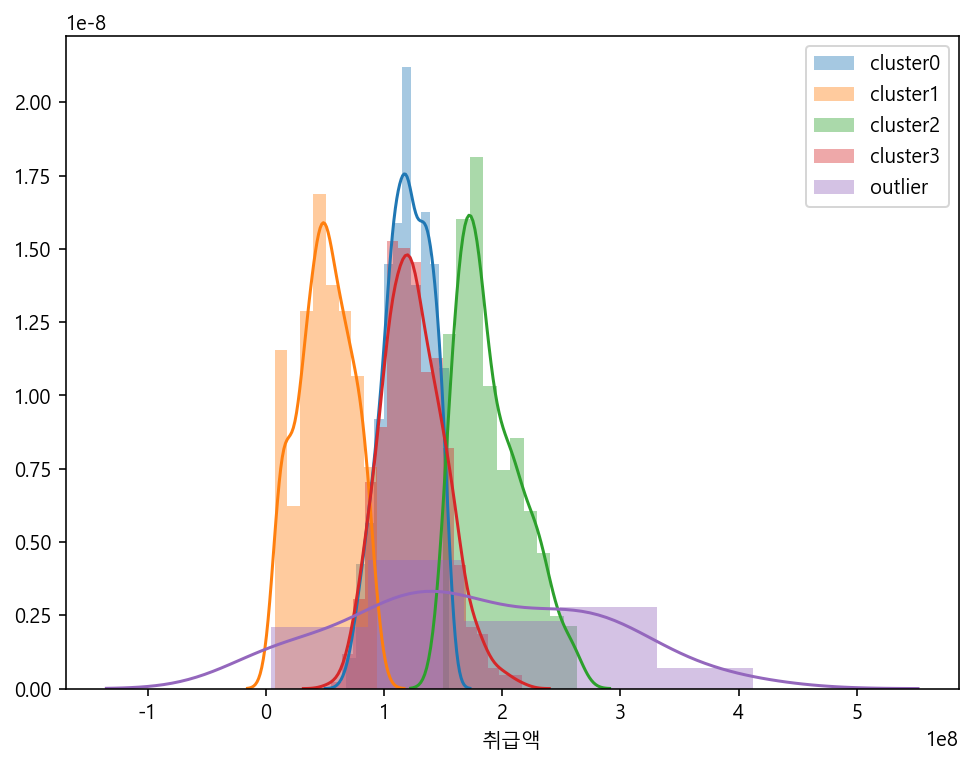

In [14]:
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(8, 6))
sns.distplot(df_0['취급액'], label='cluster0')
sns.distplot(df_1['취급액'], label='cluster1')
sns.distplot(df_2['취급액'], label='cluster2')
sns.distplot(df_3['취급액'], label='cluster3')
sns.distplot(df_out['취급액'], label='outlier')
plt.legend()
plt.show()

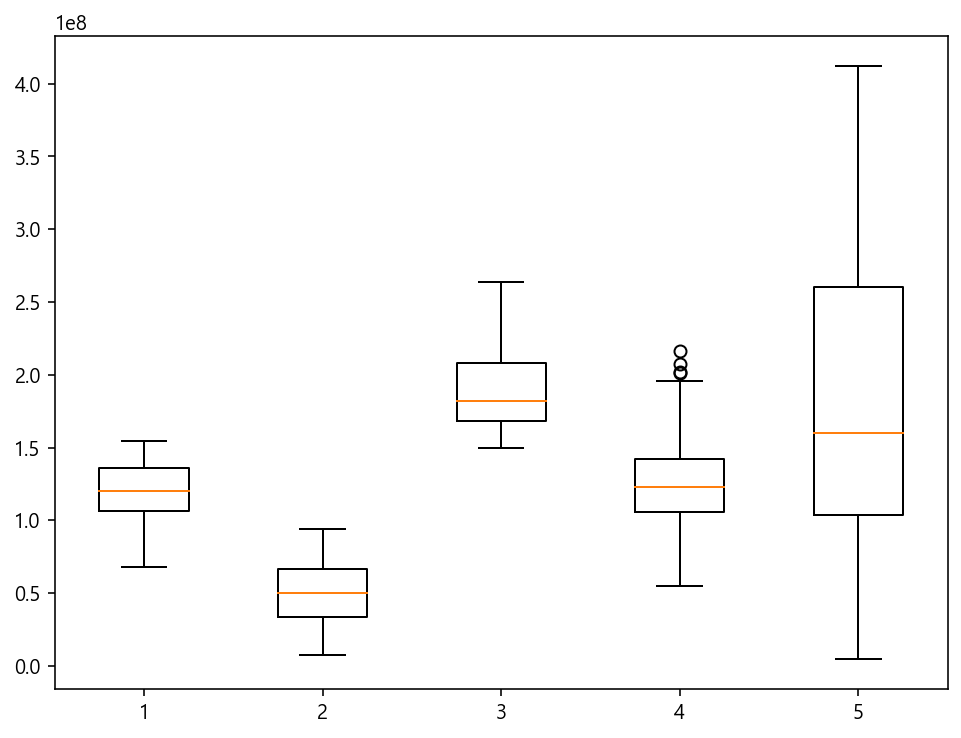

In [15]:
# 전체 취급액 boxplot

plt.figure(figsize=(8, 6))
sales = [df_0['취급액'], df_1['취급액'], df_2['취급액'], df_3['취급액'], df_out['취급액']]
plt.boxplot(sales)
plt.show()

### 노출(분)
- 클러스터 1에 노출 적은 게 있고,
- 나머지는 전부 다 노출 비슷.

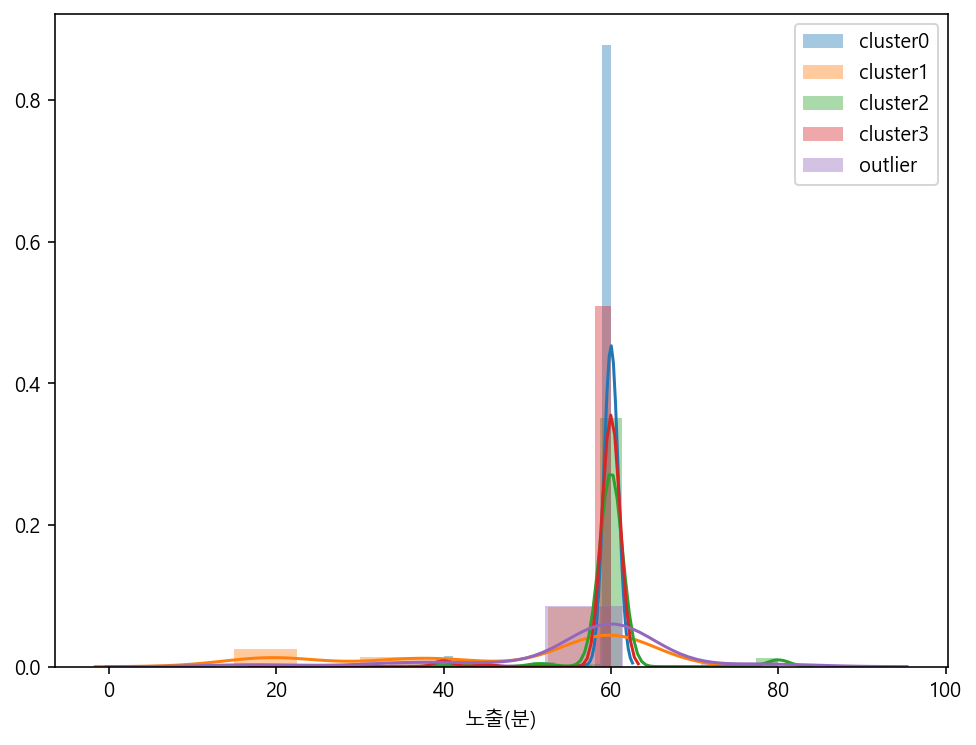

In [16]:
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(8, 6))
sns.distplot(df_0['노출(분)'], label='cluster0')
sns.distplot(df_1['노출(분)'], label='cluster1')
sns.distplot(df_2['노출(분)'], label='cluster2')
sns.distplot(df_3['노출(분)'], label='cluster3')
sns.distplot(df_out['노출(분)'], label='outlier')
plt.legend()
plt.show()

### 판매단가
- 클러스터별로 다르다.
- 나중에 클러스터별로 봐야 할듯.
- outlier 빼고 판매단가 확인하면,
    - 0은 30000~45000원대,
    - 1은 30000~60000원대까지 골고루,
    - 2도 30000~60000원대까지 골고루,
    - 3은 50000~60000원대. 3에 이상치 있는데, 취급액에 있는 이상치가 여기서 온 게 아닐까?
- 취급액에서는 오히려 0, 3이 겹쳤는데, 판매단가는 1, 2가 겹친다.
    - 0, 3은 판매단가 비슷한데 취급액이 다르다.
        - 어떤 이유에서엔가 비슷한 판매단가 범위인데 결과는 다르다.
        - 시청률? 시간대?
    - 1, 2는 판매단가 안 비슷한데, 취급액이 겹친다.
        - 판매단가가 다른데, 취급액이 비슷하다면,
        - 위와 동일하게 시청률, 시간대, 계절 등 요인으로 인해 비슷한 결과인지,
        - 품목 자체가 둘 다 크게 판매단가에 영향을 받지 않는 것인지?

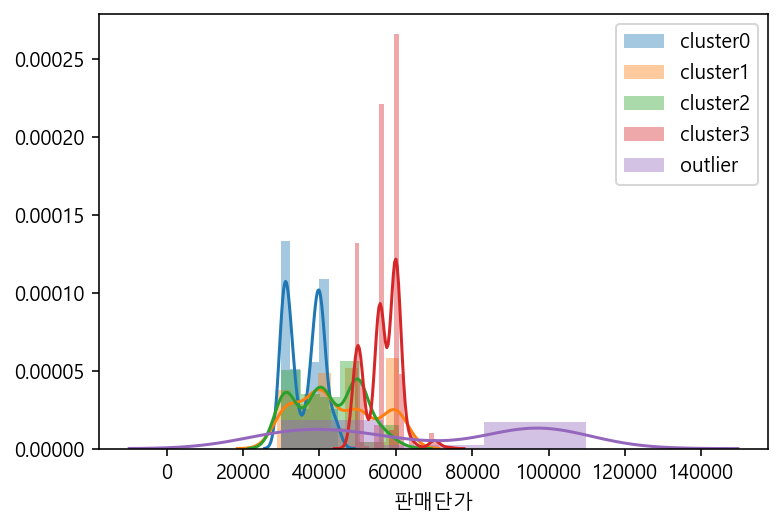

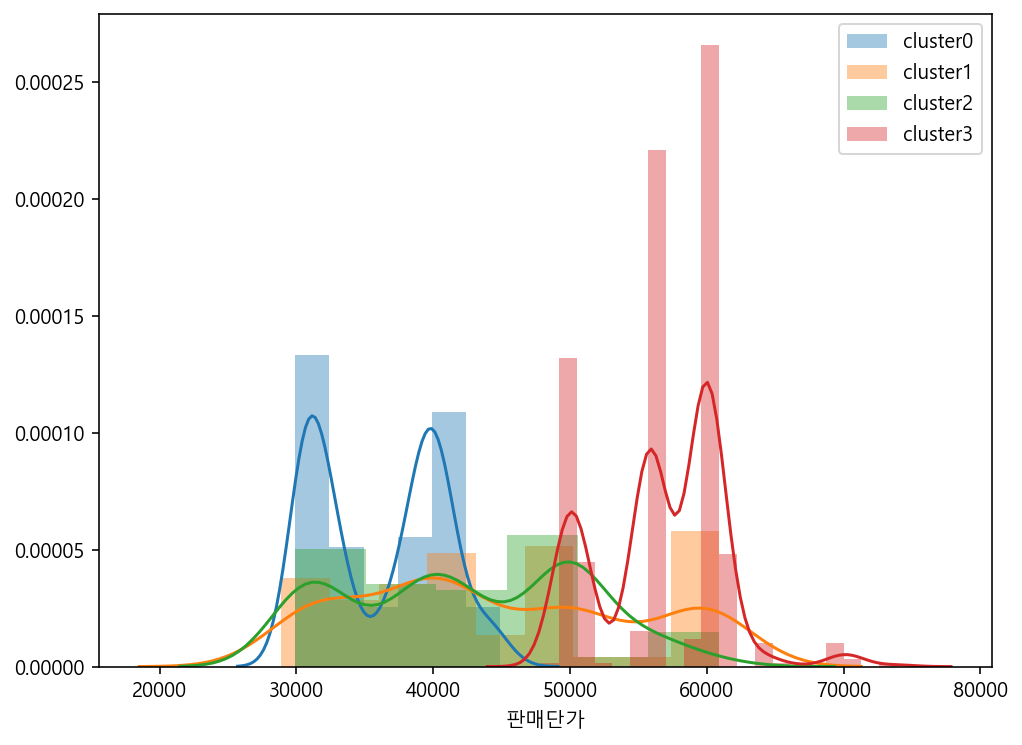

In [17]:
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(6, 4))
sns.distplot(df_0['판매단가'], label='cluster0')
sns.distplot(df_1['판매단가'], label='cluster1')
sns.distplot(df_2['판매단가'], label='cluster2')
sns.distplot(df_3['판매단가'], label='cluster3')
sns.distplot(df_out['판매단가'], label='outlier')
plt.legend()
plt.show()

# 이상치 제외
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(8, 6))
sns.distplot(df_0['판매단가'], label='cluster0')
sns.distplot(df_1['판매단가'], label='cluster1')
sns.distplot(df_2['판매단가'], label='cluster2')
sns.distplot(df_3['판매단가'], label='cluster3')
plt.legend()
plt.show()

### 판매량
- 판매단가에 비해서는 군집별로 골고루 퍼져 있다.
- outlier 빼고 확인하면, 1, 3, 0, 2 순.
    - 1: 판매단가 퍼져있는 편이지만, 판매량 낮은 편 = 취급액 낮음.
    - 3: 판매단가 높은 편, 판매량 2등 = 취급액 중간.
    - 0: 판매단가 3보다 높은 편, 판매량 3보다 낮은 편 = 취급액 중간.
    - 2: 판매단가 퍼져 있는 편이지만, 판매량 높은 편 = 취급액 높음. 특히 판매량 퍼진 범위가 이상치 제외하면 제일 넓음.

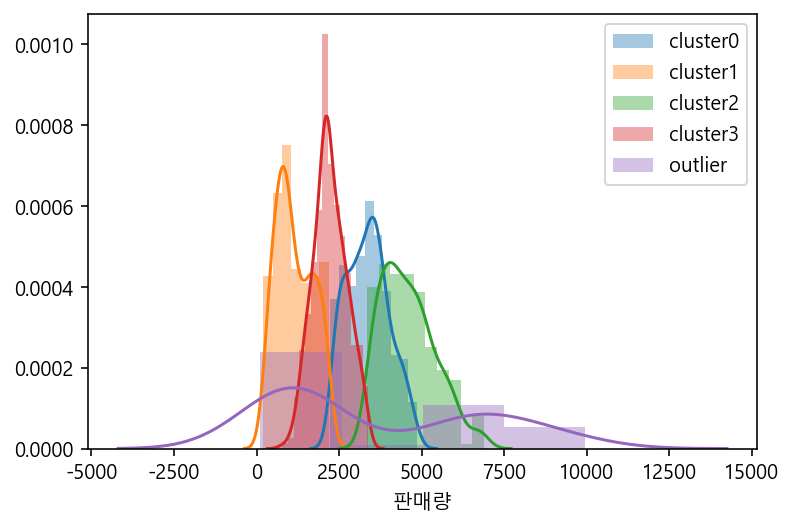

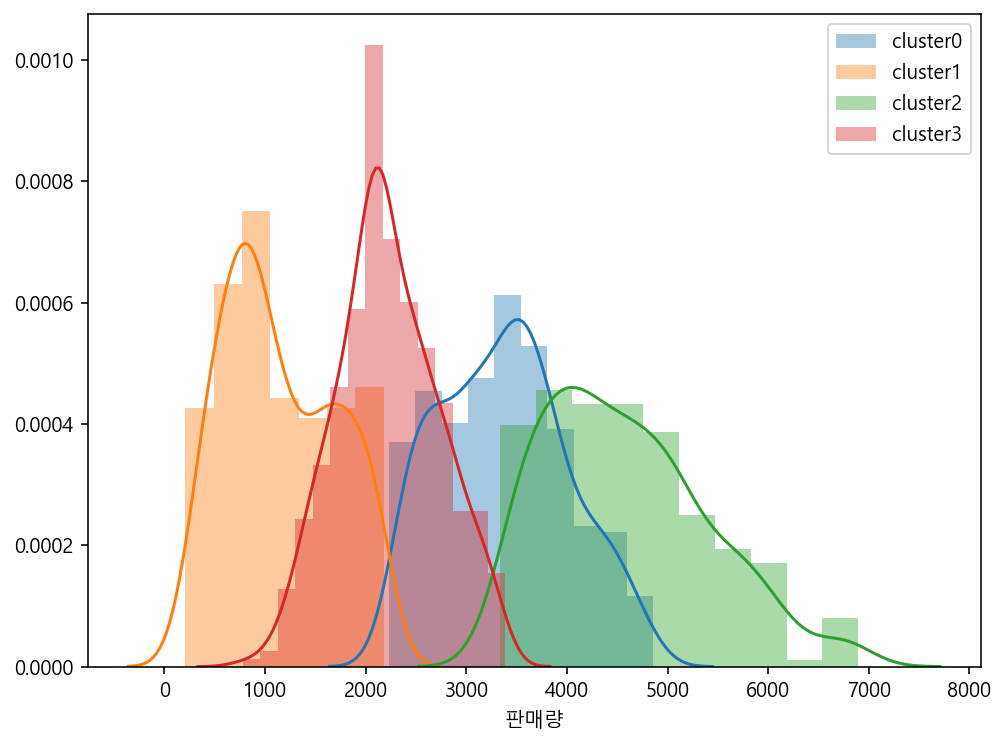

In [18]:
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(6, 4))
sns.distplot(df_0['판매량'], label='cluster0')
sns.distplot(df_1['판매량'], label='cluster1')
sns.distplot(df_2['판매량'], label='cluster2')
sns.distplot(df_3['판매량'], label='cluster3')
sns.distplot(df_out['판매량'], label='outlier')
plt.legend()
plt.show()

# 이상치 제외
# 전체 클러스터 한 번에 나타내기
plt.figure(figsize=(8, 6))
sns.distplot(df_0['판매량'], label='cluster0')
sns.distplot(df_1['판매량'], label='cluster1')
sns.distplot(df_2['판매량'], label='cluster2')
sns.distplot(df_3['판매량'], label='cluster3')
plt.legend()
plt.show()

## 클러스터 0
- 고만고만한 느낌.
- 판매량도 전체 농수축이랑 비교했을 때 중간값 이상.
- 고등어가 지배하는.. 느낌? 고등어가 평타는 치는 애인가? 그런 듯하다.

- cluster 0까지 봤을 때는 전체적으로 농수축 경향성 따라가는 듯.
- 상품명 몇 개 특이한 거 있었는데, 전반적으로 많이 나오는 애라서 특이하다고는 말 못하겠다.
- 조금 더 봐볼 것.

In [19]:
# 쓰다 보니 궁금해진 고등어
df_0[df_0['상품명'].str.contains('고등어')].describe()

,노출(분),판매단가,판매량,취급액
count,75.000000,75.0,75.000000,7.500000e+01
mean,59.466667,30900.0,3900.285653,1.205188e+08
std,3.243844,0.0,517.523265,1.599147e+07
min,40.000000,30900.0,2664.304207,8.232700e+07
25%,60.000000,30900.0,3511.779935,1.085140e+08
50%,60.000000,30900.0,3944.724919,1.218920e+08
75%,60.000000,30900.0,4249.239482,1.313015e+08
max,60.000000,30900.0,4821.197411,1.489750e+08


### 요약 통계량, 상관관계
- 상관관계만 확인했을 때 크게 눈에 들어오는 건, `판매단가가 높은데 판매량 조금씩 떨어지는` 구조.

In [20]:
# 요약 통계량
df_0.describe()

,노출(분),판매단가,판매량,취급액
count,360.000000,360.000000,360.000000,3.600000e+02
mean,59.575370,36047.222222,3368.699634,1.199846e+08
std,2.783966,4557.034790,633.773759,1.942333e+07
min,40.000000,29900.000000,2228.906606,6.821400e+07
25%,60.000000,30900.000000,2847.629980,1.066262e+08
50%,60.000000,36900.000000,3379.842692,1.204450e+08
75%,60.000000,39900.000000,3809.407804,1.356598e+08
max,60.000000,44900.000000,4858.361204,1.547290e+08


,노출(분),판매단가,판매량,취급액
노출(분),1.000000,0.037568,0.131106,0.173485
판매단가,0.037568,1.000000,-0.502646,0.204859
판매량,0.131106,-0.502646,1.000000,0.735862
취급액,0.173485,0.204859,0.735862,1.000000


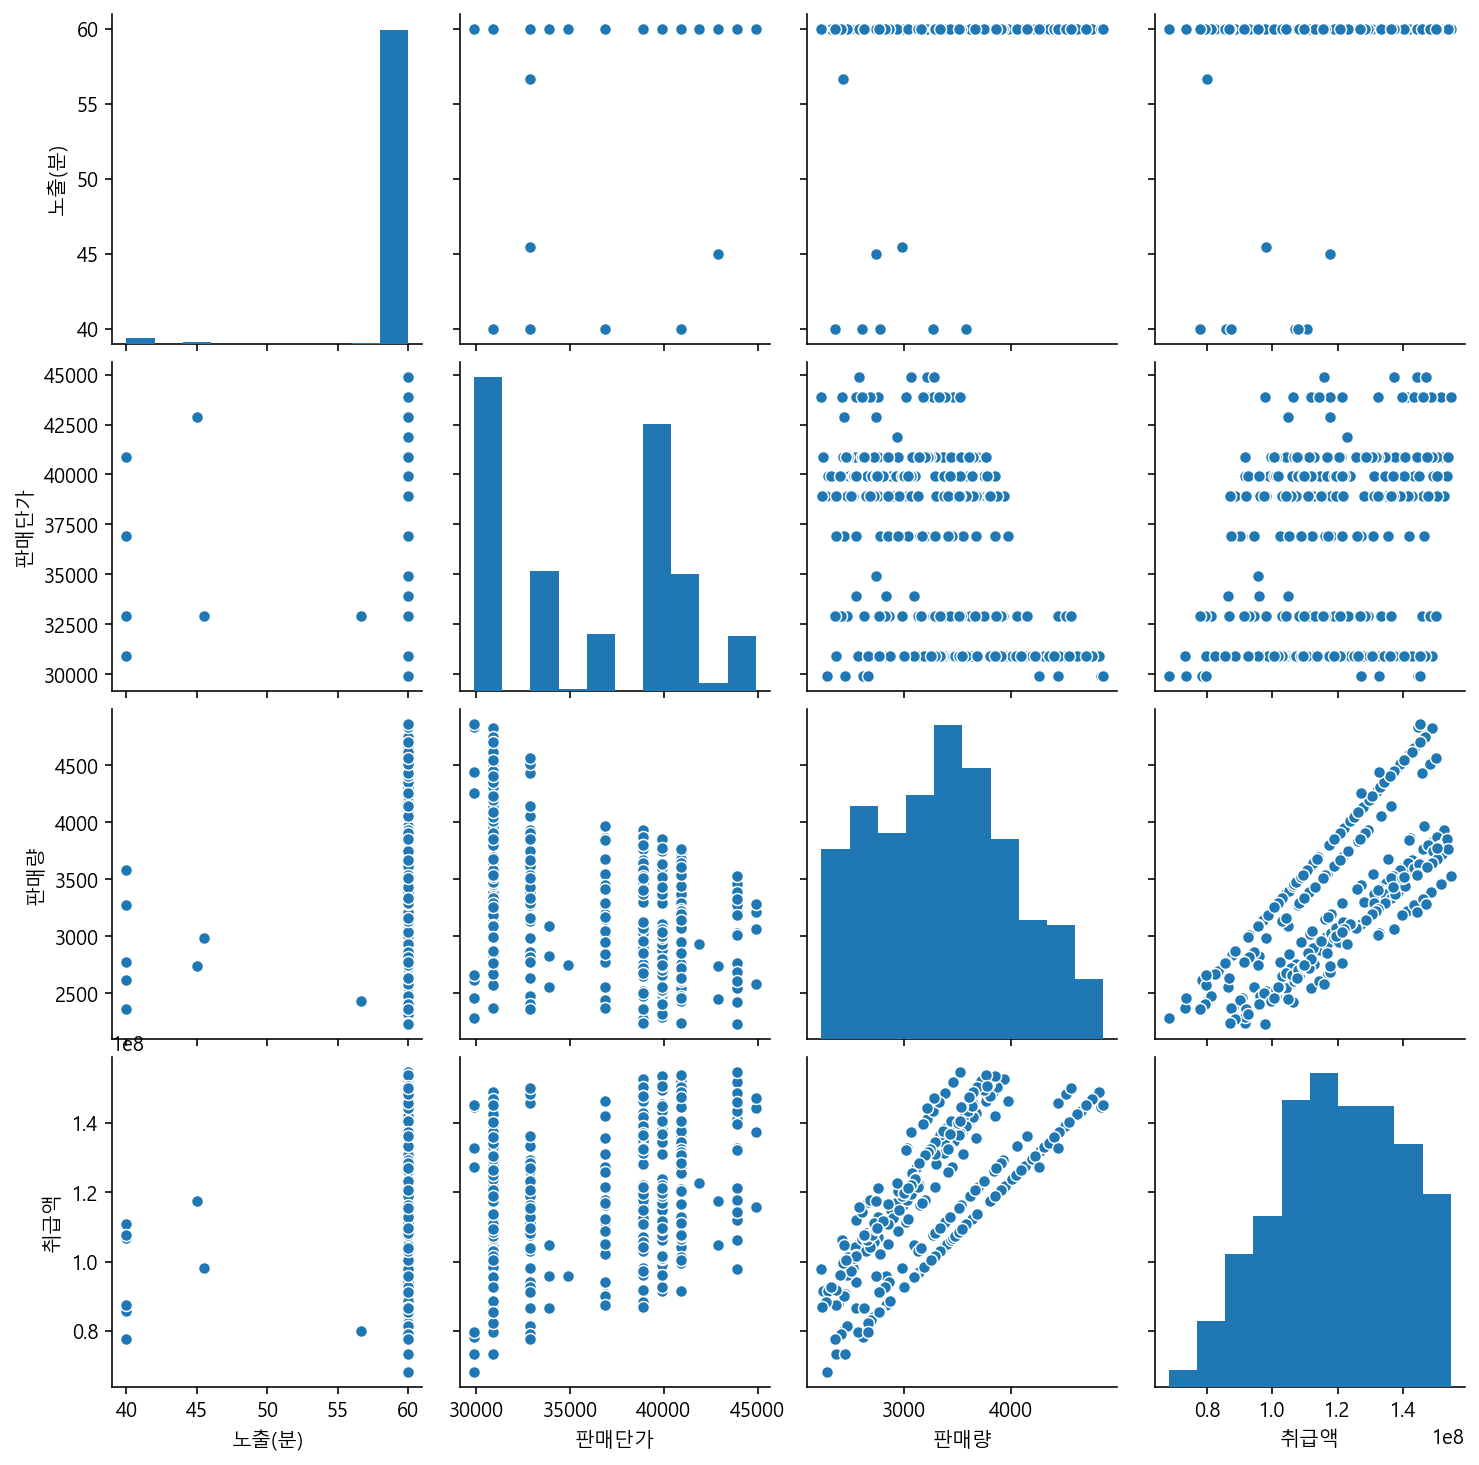

In [21]:
# 상관관계
display(df_0.corr())

# 그림: 판매단가, 판매량 사이에 mild하게 음의 상관관계가 있는 듯한데?
sns.pairplot(df_0[['노출(분)', '판매단가', '판매량', '취급액']])
plt.show()        

### 계절별, 월별 분포
- 계절별로 보면, **가을**이 눈에 띈다.
- 농수축 전체 상품 월별 분포와 비교했을 때, 상대적으로 3월, 5월, 9월이 많은 편.
> - 해산?수산?물 많다.
> - 9월에는 김치, 젓갈류.

    - 3월 상품: 간고등어, 통오징어, 왕꼬막, 홍어, 재첩국 // 쥐포.
    - 5월 상품: 간고등어, 통오징어 // 모시떡, 갓김치3kg+총각김치3kg (총6kg) // 쥐포.
    - 9월 상품: 간고등어, 통오징어, 손질갈치, 새우+동태, 재첩국, 젓갈세트, 손질낙지+연포탕, 황태 // 모시떡, 갓김치+오이소박이, 갓김치+총각김치, 포기김치, 포기김치+백김치 // 검은콩두유+아몬드두유, 강정바 // 닭발, 

- 우리가 예측해야 하는 6월은 여기에 많이 분포하지는 않는다.

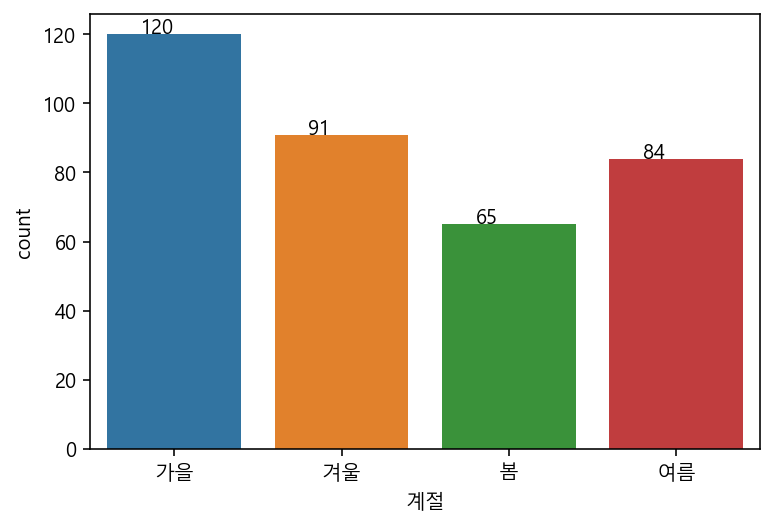

In [22]:
# 계절별 상품 분포
ax = sns.countplot(df_0['계절'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+0.2))
plt.show()

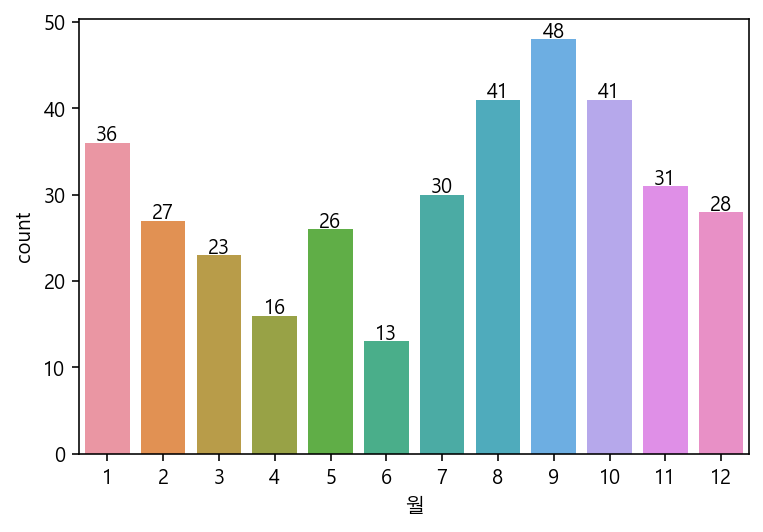

1     0.232258
2     0.287234
3     0.315068
4     0.258065
5     0.302326
6     0.185714
7     0.254237
8     0.242604
9     0.342857
10    0.317829
11    0.279279
12    0.254545
Name: 월, dtype: float64


In [23]:
# 월별 상품 분포
ax = sns.countplot(df_0['월'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+0.2))
plt.show()

# 전체 상품 분포와 비교
print(df_0['월'].value_counts().sort_values().sort_index() / data['월'].value_counts().sort_values().sort_index())

In [24]:
# 3월 상품 확인
df_0[df_0['월'] == 3]['상품명'].value_counts()

안동간고등어 20팩                9
옛날 그 쥐포 110장 (11팩)        6
자연산 손질 통오징어 21미           2
김정문의 섬진강 재첩국 11팩 3.3kg    2
영산포숙성 홍어8팩+무침3통           2
우리바다 손질왕꼬막 24팩            1
우리바다 손질왕꼬막 20팩            1
Name: 상품명, dtype: int64

In [25]:
# 8월 상품 확인
df_0[df_0['월'] == 8]['상품명'].value_counts()

깐깐송도순 포기김치 10kg                    9
안동간고등어 20팩                         9
영광 生 모시떡 130개(동부기피80개+검정깨50개)      3
궁중 손질새우 200미 + 동태포 400g            3
현대어찬 손질갈치                          3
영광 生 모시떡 100개!!(동부기피70개+검정깨30개)    2
옛날 그 쥐포 110장 (11팩)                 2
하늘내린 용대리황태10마리                     2
AAB의 든든한 콩국수                       1
영산포숙성 홍어 9팩                        1
명인 김규흔의 영양 강정바 60개+무료체험5개          1
자연산 손질 통오징어 21미                    1
이정섭의 비가린 배추김치 10kg                 1
유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg)      1
창녕 마늘양파듬뿍삼계탕 1kg, 6팩               1
잔다리 전두부세트                          1
Name: 상품명, dtype: int64

In [26]:
# 9월 상품 확인
df_0[df_0['월'] == 9]['상품명'].value_counts()

현대어찬 손질갈치                            8
하늘내린 용대리황태10마리                       7
고칼슘검은콩두유48팩+호두아몬드 두유48팩              6
궁중 손질새우 200미 + 동태포 400g              5
깐깐송도순 포기김치 10kg                      5
안동간고등어 20팩                           3
하림뼈없는양념닭발세트                          3
영광 生 모시떡 130개(동부기피80개+검정깨50개)        2
명인 김규흔의 영양 강정바 60개+무료체험5개            2
깐깐송도순 포기김치 8kg+ 백김치 2kg              1
김정문의 섬진강 재첩국 11팩 3.3kg               1
김정배 명인 젓갈세트 8통                       1
참바다손질낙지100미+양념장+연포탕육수                1
국내산 손질 통오징어 21미                      1
유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg)        1
유귀열의 The 귀한 갓김치4kg+오이소박이2kg, 총6kg    1
Name: 상품명, dtype: int64

### 요일별 분포
- 화, 목, 금에 파는 비중 높은데, 애초에 이 클러스터의 개수가 전체 2등이라서 그럴 수도 있을 듯.
- 주말 분포가 현저히 적다 : 실제로 확인했을 때 특이한 건 발견하지 못하겠다. **혹시 다른 클러스터에 주말에 판매단가 높은 애들 파는지 확인**.

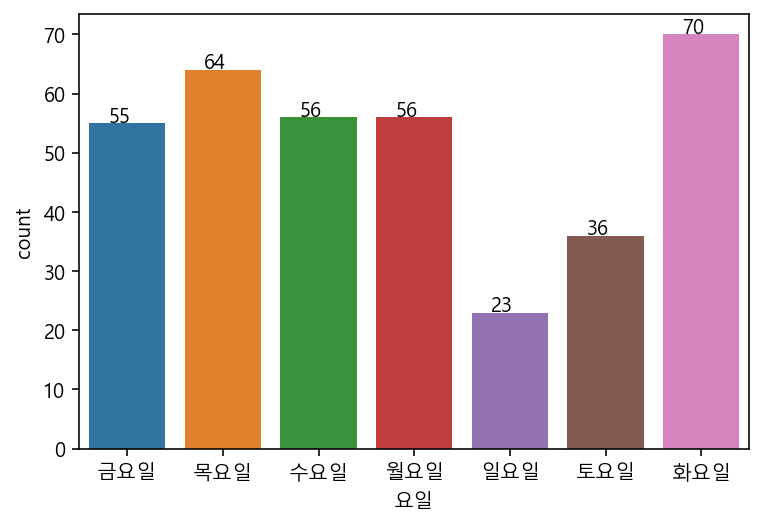

금요일    0.308989
목요일    0.321608
수요일    0.291667
월요일    0.270531
일요일    0.140244
토요일    0.209302
화요일    0.341463
Name: 요일, dtype: float64


In [27]:
# 시각화
ax = sns.countplot(df_0['요일'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+0.2))
plt.show()

# 전체 상품 분포와 비교
print(df_0['요일'].value_counts().sort_values().sort_index() / data['요일'].value_counts().sort_values().sort_index())

In [28]:
# # 일요일 상품 확인
# df_0[df_0['요일'] == '일요일']

### 시간대별 분포
- 클러스터 내에서는, 16 ~ 18시에 **유독** 많다. 
    - 애초에 많이 보이는 상품들.
- 전체 상품과 비교하면, 09시, 14시, 13시, 10시의 비중이 높은 편. 오히려 16~18시는 눈에 띄게 높지는 않다.

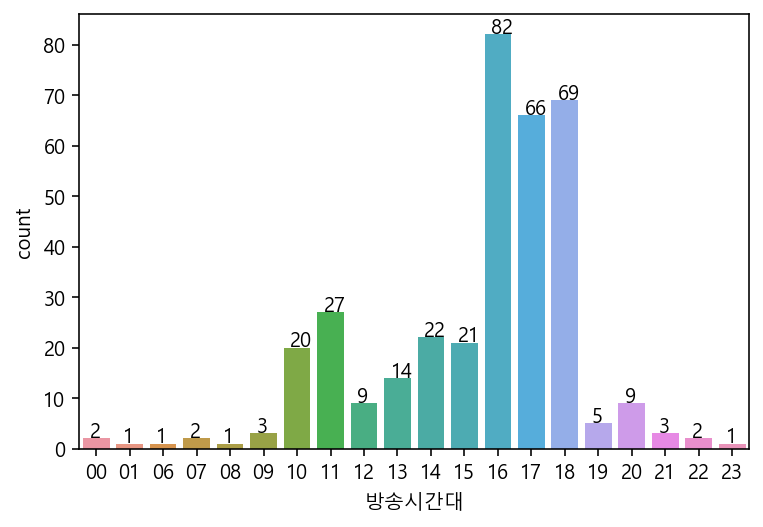

00    1.000000
08    1.000000
09    0.600000
14    0.407407
07    0.333333
13    0.333333
10    0.322581
18    0.309417
11    0.306818
16    0.304833
20    0.281250
23    0.250000
15    0.235955
17    0.234043
12    0.225000
06    0.166667
19    0.156250
21    0.136364
22    0.111111
01    0.027778
02         NaN
Name: 방송시간대, dtype: float64


In [29]:
# 시각화
ax = sns.countplot(df_0['방송시간대'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+0.2))
plt.show()

# 전체 상품 분포와 비교
print((df_0['방송시간대'].value_counts().sort_index() / data['방송시간대'].value_counts().sort_index()).sort_values(ascending=False))

In [30]:
# 오전 방송시간대 확인
df_0[df_0['방송시간대'].isin(['08', '09'])]

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
496,12,겨울,일요일,2019-12-29 09:20:00,2019-12-29 10:20:00,09,60.0,농수축,100300,200965,[통영바다의보물] 국내산 냉동 참굴 200g x (10팩+2팩),39900.0,3286.090226,131115000.0,0.0
901,12,겨울,월요일,2019-12-09 09:20:00,2019-12-09 10:20:00,09,60.0,농수축,100637,201955,영산포숙성홍어회7팩,29900.0,4257.792642,127308000.0,0.0
1191,9,가을,토요일,2019-09-07 09:00:00,2019-09-07 10:00:00,09,60.0,농수축,100844,202489,하늘내린 용대리황태10마리,32900.0,4561.884498,150086000.0,0.0
1206,1,겨울,화요일,2019-01-29 08:00:00,2019-01-29 09:00:00,08,60.0,농수축,100844,202491,하늘내린 용대리황태10미,32900.0,2630.000000,86527000.0,0.0


In [31]:
# 오후 방송시간대 확인
df_0[df_0['방송시간대'].isin(['16', '17', '18'])]['상품명'].value_counts() # 나쁘지 않게 팔렸다.

안동간고등어 20팩                           56
유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg)        22
자연산 손질 통오징어 21미                      15
영광 生 모시떡 100개!!(동부기피70개+검정깨30개)      12
현대어찬 손질갈치                            12
옛날 그 쥐포 110장 (11팩)                   12
하림뼈없는양념닭발세트                          11
깐깐송도순 포기김치 10kg                       8
김정문의 섬진강 재첩국 11팩 3.3kg                7
영산포숙성 홍어8팩+무침3통                       6
김정배 명인 젓갈세트 8통                        5
고칼슘검은콩두유48팩+호두아몬드 두유48팩               4
강원도양구 간편시래기 + 시래기 들깨 무침               4
국내산 손질 통오징어 21미                       4
궁중 손질새우 200미 + 동태포 400g               4
창녕 마늘양파듬뿍삼계탕 1kg, 6팩                  3
궁중 손질새우 200미 + 동태포 200g               3
유귀열의 The 귀한 갓김치3kg+열무김치3kg, 총6kg      3
우리바다 손질왕꼬막 24팩                        2
참바다손질낙지100미+양념장+연포탕육수                 2
영광 生 모시떡 130개(동부기피80개+검정깨50개)         2
유귀열의 The 귀한 갓김치4kg+오이소박이2kg, 총6kg     2
하늘내린 용대리황태10마리                        2
천연담아 명품다시팩 100포                       1
국내산 손질 가자미 36미!                       1


In [32]:
# 00시, 08시 확인
df_0[df_0['방송시간대'].isin(['00', '08'])]

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
1166,10,가을,토요일,2019-10-05 00:00:00,2019-10-05 00:45:28,00,45.466667,농수축,100841,202484,옛날 그 쥐포 110장 (11팩),32900.0,2983.556231,98159000.0,0.0
1178,12,겨울,월요일,2019-12-23 00:20:00,2019-12-23 01:20:00,00,60.000000,농수축,100841,202484,옛날 그 쥐포 110장 (11팩),32900.0,4434.072948,145881000.0,0.0
1206,1,겨울,화요일,2019-01-29 08:00:00,2019-01-29 09:00:00,08,60.000000,농수축,100844,202491,하늘내린 용대리황태10미,32900.0,2630.000000,86527000.0,0.0


### 각 범주별 취급액과의 관계 확인

- 전체적인 농수산 분포 특징과 마찬가지로, sum -> mean으로 가면 별 차이가 없어진다.
- 전체 농수산 편성과 달리 봄에 좀 많은 느낌이었는데, 취급액 sum은 봄이 적다.
- 이상치: 확인했는데 거의 비슷한 애들만 나오는 느낌?
    - 23시: 홍어. 이 군집 안에서는 대박난 느낌인데, 전체 농수산 판매량 평균과 비슷하다.

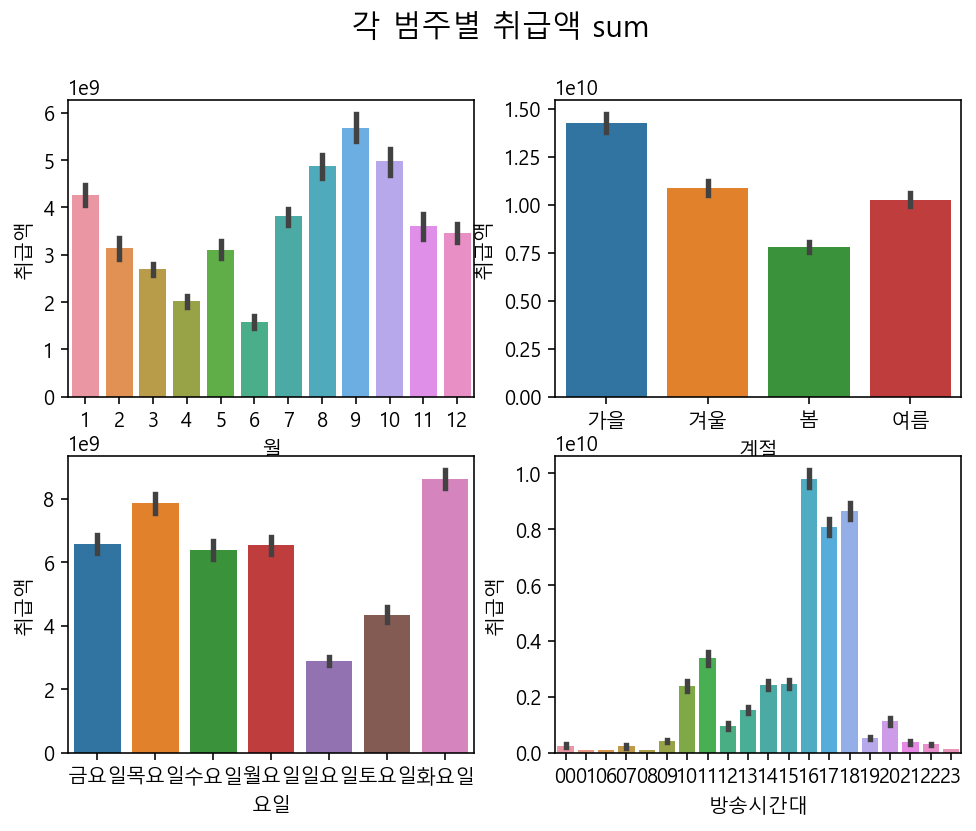

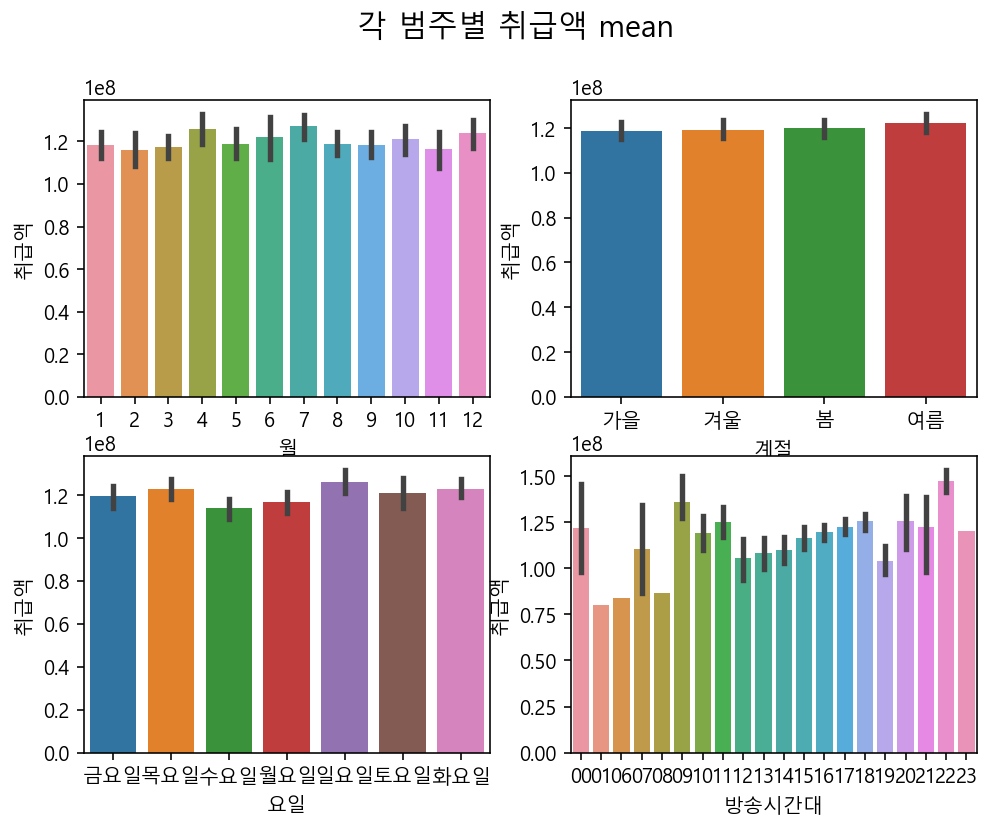

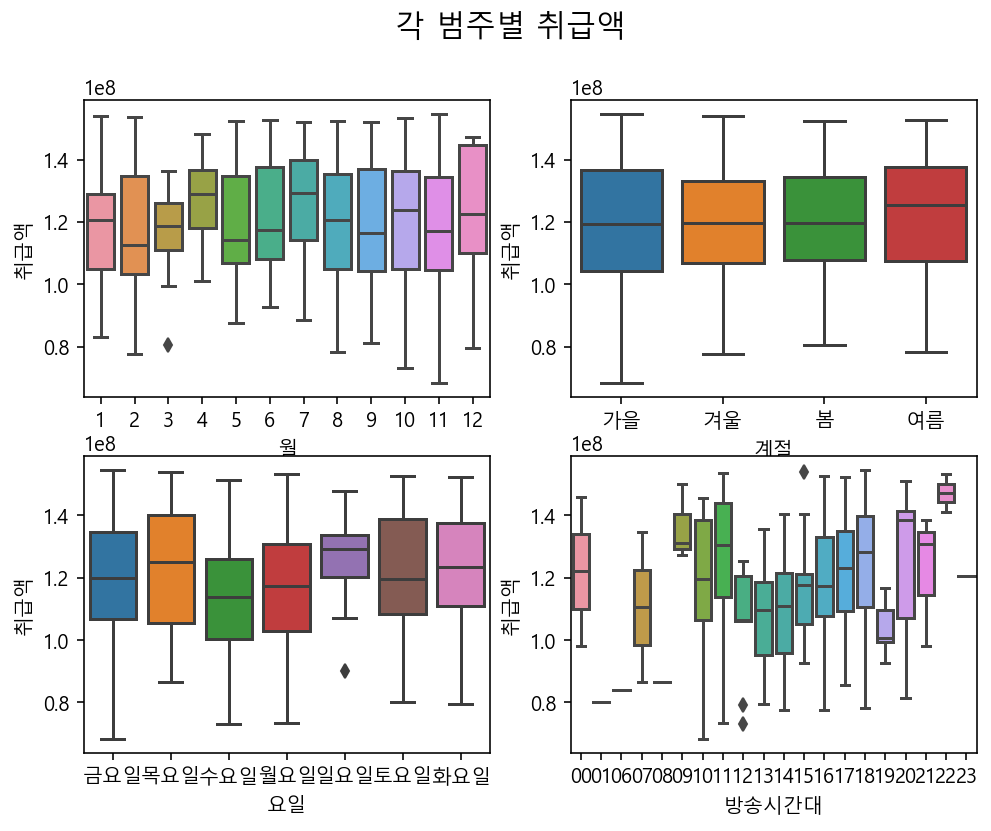

In [33]:
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '취급액', 'bar', 'sum')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '취급액', 'bar', 'mean')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '취급액', 'box')

In [34]:
# 방송시간대 이상치 확인
df_0[df_0['방송시간대'].isin(['12', '16'])]['상품명'].unique()

array(['궁중 손질새우 200미 + 동태포 400g', '궁중 손질새우 200미 + 동태포 200g',
       '고칼슘검은콩두유48팩+호두아몬드 두유48팩', '통뼈 감자탕 8팩',
       '영광 生 모시떡 100개!!(동부기피70개+검정깨30개)',
       '유귀열의 The 귀한 갓김치3kg+열무김치3kg, 총6kg',
       '유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg)', '안동간고등어 20팩', '우리바다 손질왕꼬막 20팩',
       '하림뼈없는양념닭발세트', '국내산 손질 통오징어 21미', '자연산 손질 통오징어 21미', '국내산참조기12팩',
       '현대어찬 손질갈치', '깐깐송도순 포기김치 10kg', '천연담아 명품다시팩 100포', '영산포숙성홍어회7팩',
       '강원도양구 간편시래기 + 시래기 들깨 무침', '국내산 손질 가자미 36미!', '영산포숙성 홍어8팩+무침3통',
       '김정문의 섬진강 재첩국 11팩 3.3kg', '이정섭의 비가린 배추김치 10kg', '장보고 완도매생이 30개',
       '국내산 손질 피꼬막 23팩', '참바다손질낙지100미+양념장+연포탕육수', '옛날 그 쥐포 110장 (11팩)',
       '하늘내린 용대리황태10미'], dtype=object)

In [35]:
# 요일 이상치 확인
df_0[df_0['요일'].isin(['일요일'])]['상품명'].unique()

array(['궁중 손질새우 200미 + 동태포 400g', '영광 生 모시떡 100개!!(동부기피70개+검정깨30개)',
       '영광 生 모시떡 130개(동부기피80개+검정깨50개)', '유귀열의 귀한 갓김치3kg+총각김치3kg (총6kg)',
       '안동간고등어 20팩', '[통영바다의보물] 국내산 냉동 참굴 200g x (10팩+2팩)', '하림뼈없는양념닭발세트',
       '자연산 손질 통오징어 21미', '현대어찬 손질갈치', '깐깐송도순 포기김치 10kg',
       '천연담아 명품다시팩 100포', '영산포숙성 홍어8팩+무침3통', '옛날 그 쥐포 110장 (11팩)',
       '하늘내린 용대리황태10마리'], dtype=object)

### 각 범주별 판매량과의 관계 확인
취급액과 비슷한 느낌.

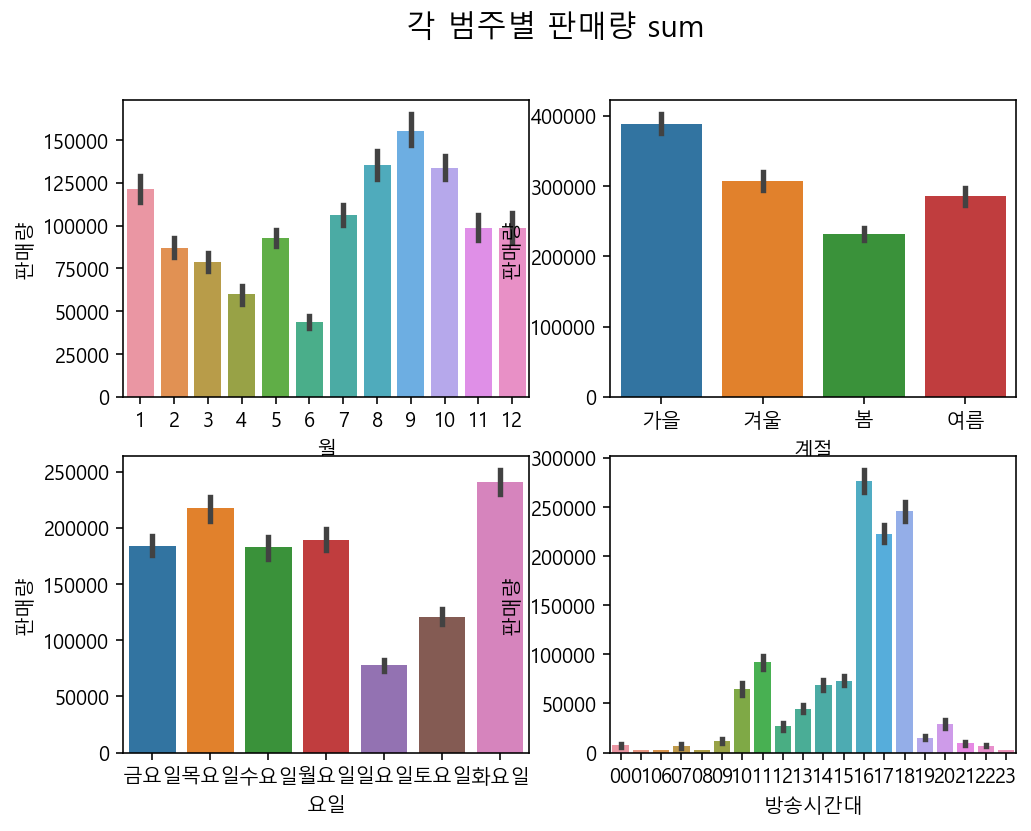

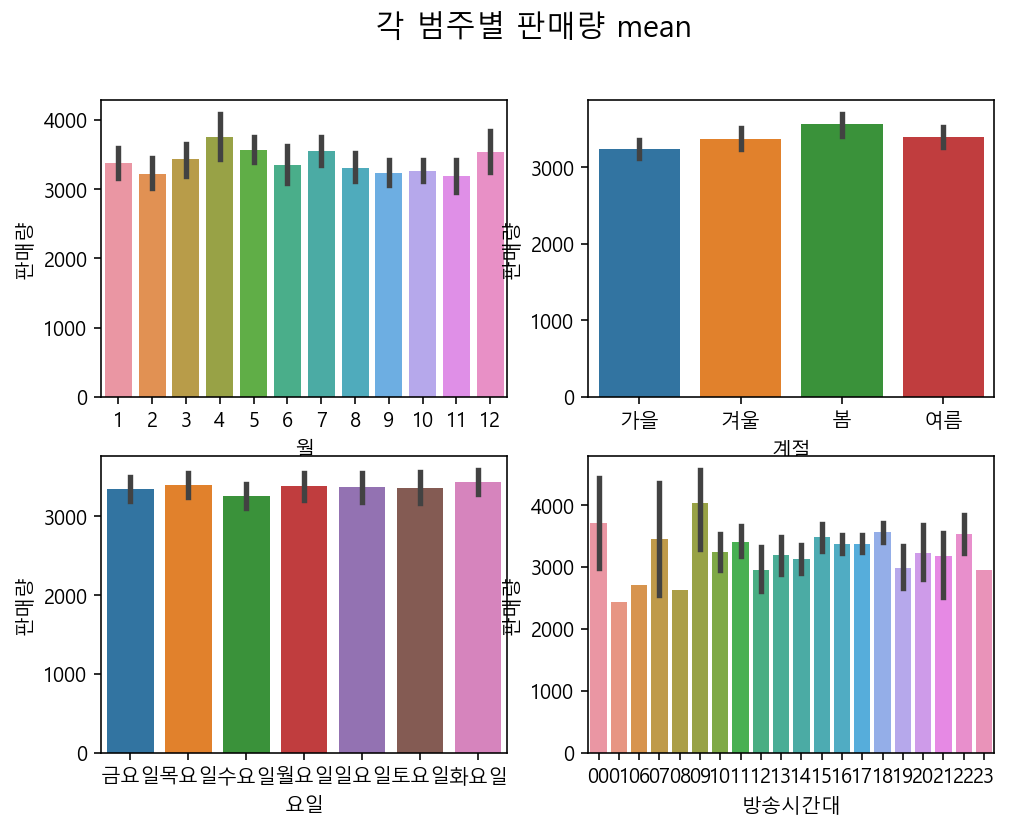

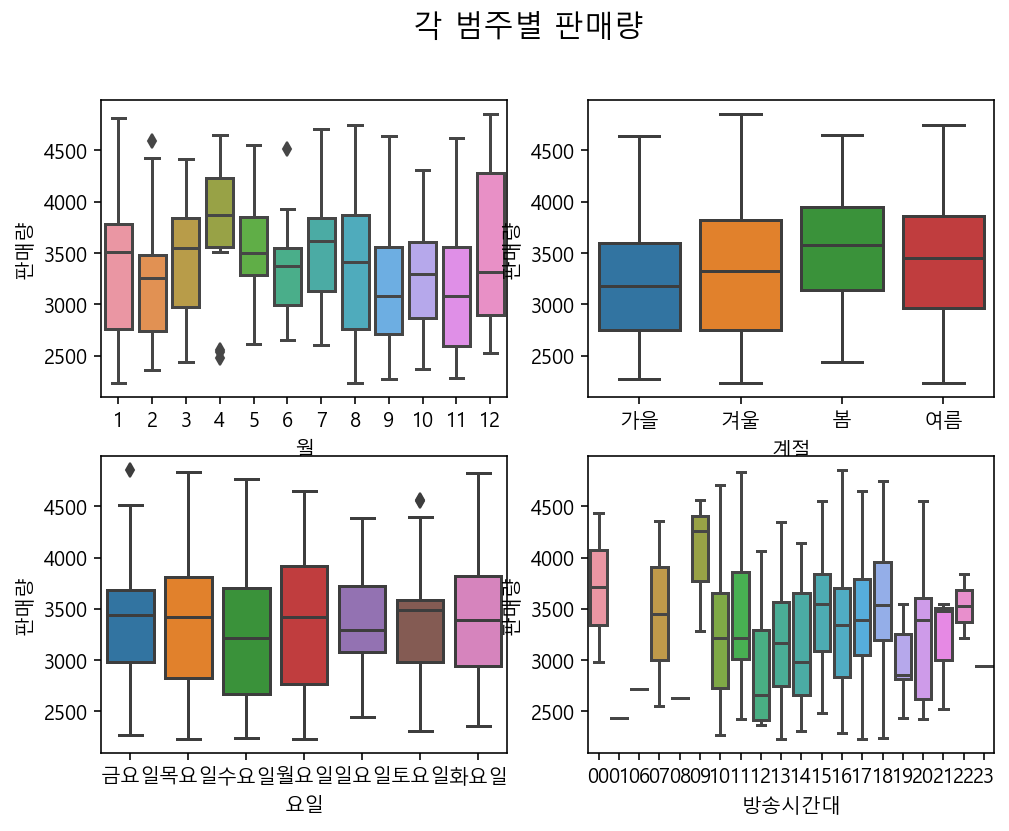

In [36]:
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매량', 'bar', 'sum')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매량', 'bar', 'mean')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매량', 'box')

### 각 범주별 판매단가와의 관계 확인
- 판매단가 거기서 거기인데

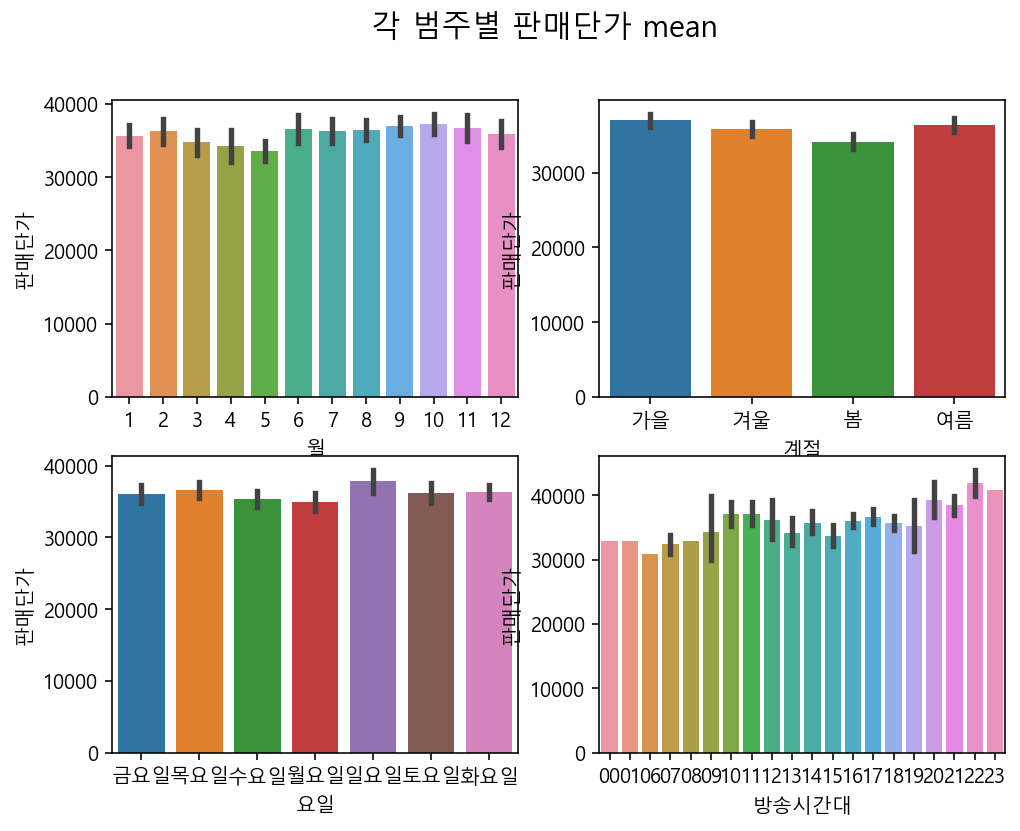

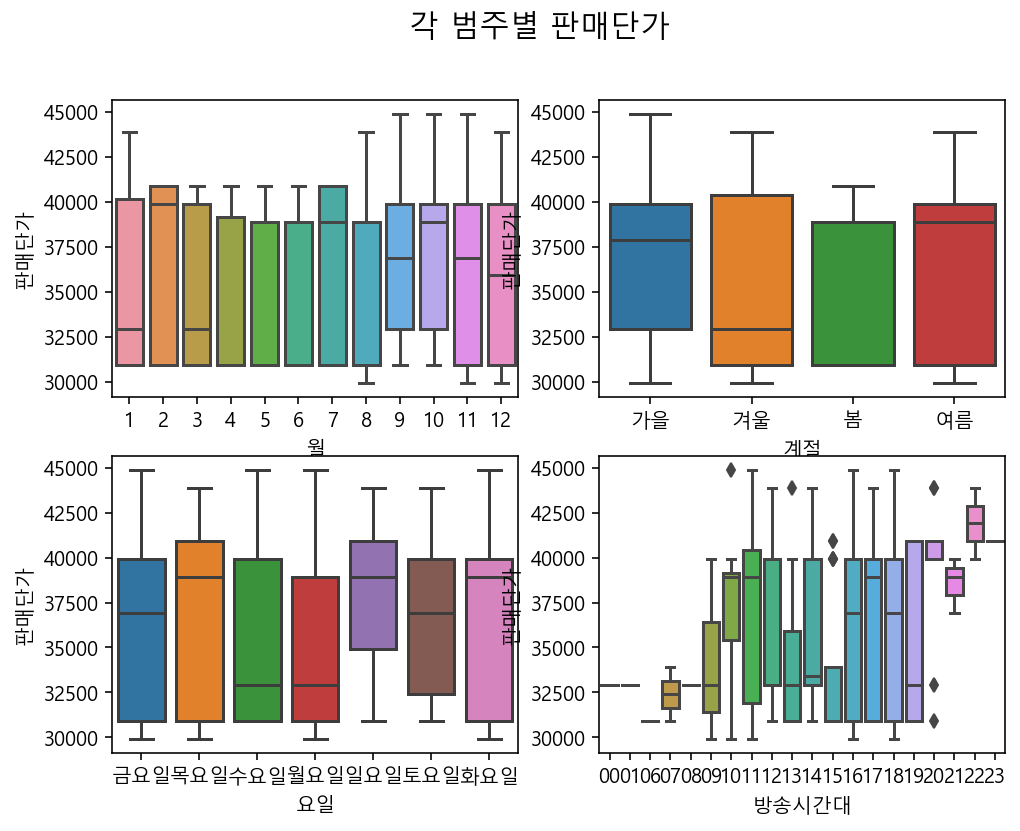

In [37]:
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매단가', 'bar', 'mean')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '판매단가', 'box')

### 각 범주별 노출 시간과의 관계 확인

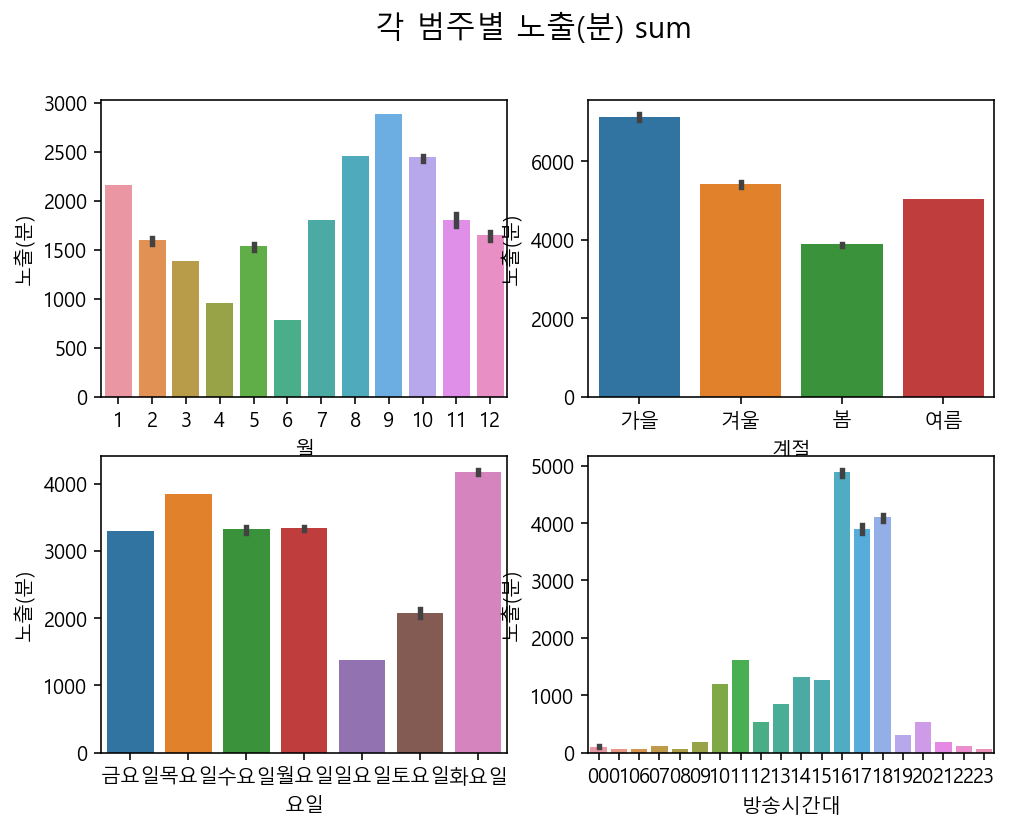

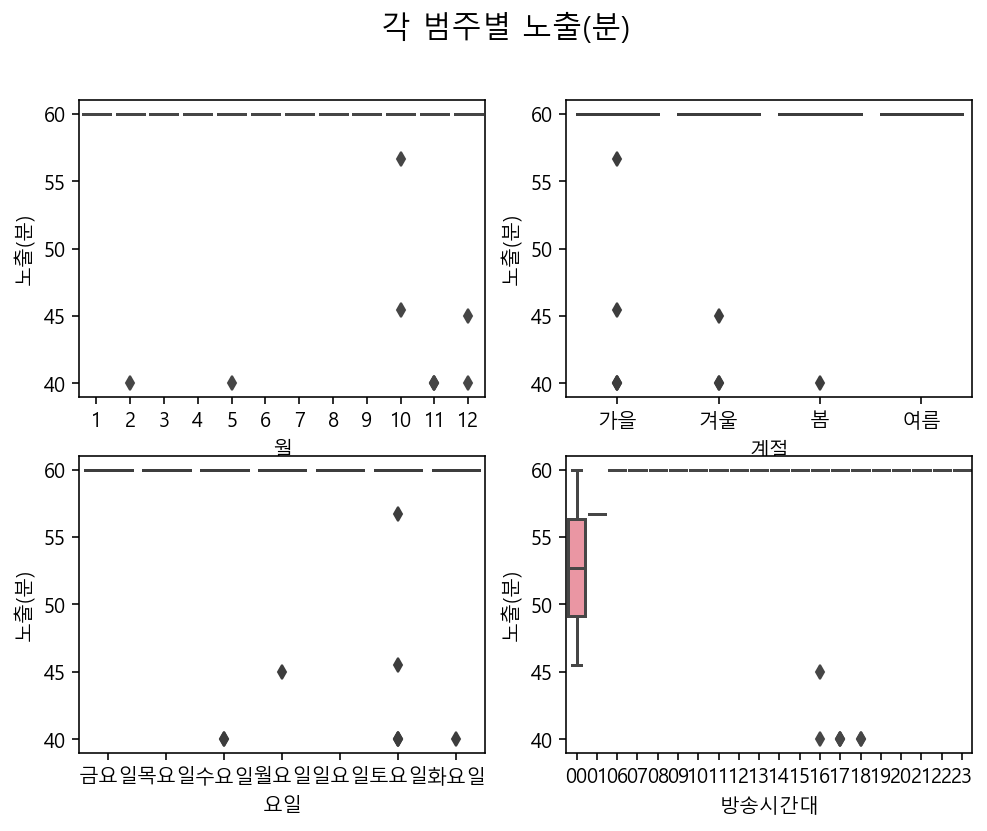

In [38]:
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '노출(분)', 'bar', 'sum')
plotCatNum(df_0, ['월', '계절', '요일', '방송시간대'], '노출(분)', 'box')

### 월별 방송시간대

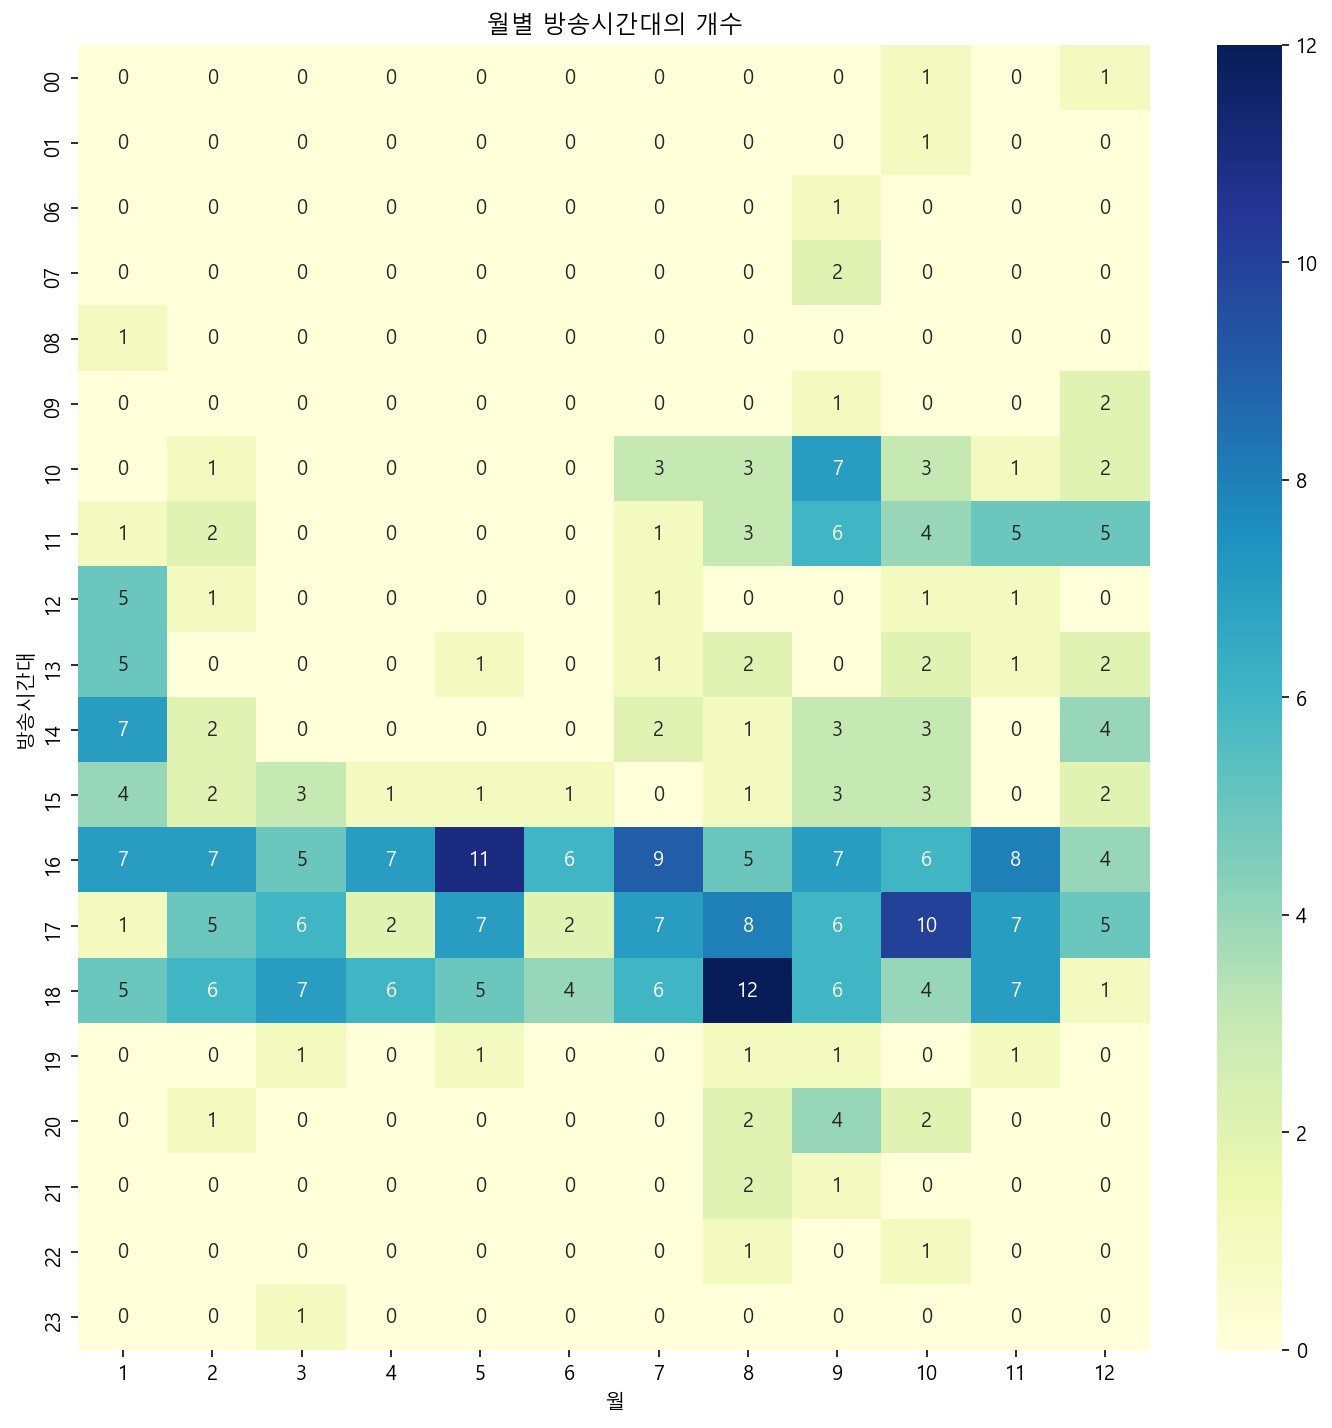

In [39]:
countCatCat(df_0, '방송시간대', '월')

## 클러스터 1

- 전체적으로 판매량이 저조한 상품이 많다: `describe()`, 상품명 확인.
- 다만, 판매량이 대부분 저조하지만, 그럼에도 불구하고 max까지 갈 때는 좀 잘 파는(이 클러스터 안에서 **상대적으로**) 애들이 있다.
- 상품명을 볼 필요성이 있다: 쌀, 모시떡이 지배하는 느낌?
    - 쌀: 최대 판매량이 전체 농수축 1사분위에도 못 미친다.
    - 모시떡: 쌀보다 심하다. 근데 또 이상한 게 많이 파는 건 많이 판다?

In [40]:
# 쓰다 보니 궁금해진 쌀과 모시떡
df_1[df_1['상품명'].str.contains('쌀')].describe()
df_1[df_1['상품명'].str.contains('모시떡')].describe()

,노출(분),판매단가,판매량,취급액
count,27.000000,27.000000,27.000000,2.700000e+01
mean,57.895062,31640.740741,672.796767,2.217681e+07
std,6.442240,2668.802563,504.804069,1.939632e+07
min,35.166667,30900.000000,241.100324,7.450000e+06
25%,60.000000,30900.000000,392.152104,1.211750e+07
50%,60.000000,30900.000000,477.184466,1.474500e+07
75%,60.000000,30900.000000,576.747573,1.782150e+07
max,60.000000,40900.000000,2011.295844,8.226200e+07


### 요약 통계량, 상관관계
- 판매단가 범위 올라감. 중간값 올라갔다. 판매량은 적어졌다. 취급액도 적어짐. 판매단가보다 판매량의 영향이 더 큰 군집.
- 상관관계에서도 보인다: 판매량과 취급액의 상관관계 매우 크다. 반면, 판매단가와취급액의 상관관계는 크지 않다.

In [41]:
# 요약 통계량
df_1.describe()

,노출(분),판매단가,판매량,취급액
count,208.000000,208.000000,208.000000,2.080000e+02
mean,48.198638,44568.269231,1148.186579,4.994369e+07
std,16.156577,10092.353871,548.726018,2.222531e+07
min,14.983333,28900.000000,207.494990,7.450000e+06
25%,36.541667,38900.000000,713.790327,3.388050e+07
50%,60.000000,40900.000000,1041.249717,5.029050e+07
75%,60.000000,49900.000000,1617.077528,6.658050e+07
max,60.000000,60900.000000,2180.200501,9.399800e+07


,노출(분),판매단가,판매량,취급액
노출(분),1.000000,-0.425358,0.368983,0.249388
판매단가,-0.425358,1.000000,-0.222995,0.173076
판매량,0.368983,-0.222995,1.000000,0.908654
취급액,0.249388,0.173076,0.908654,1.000000


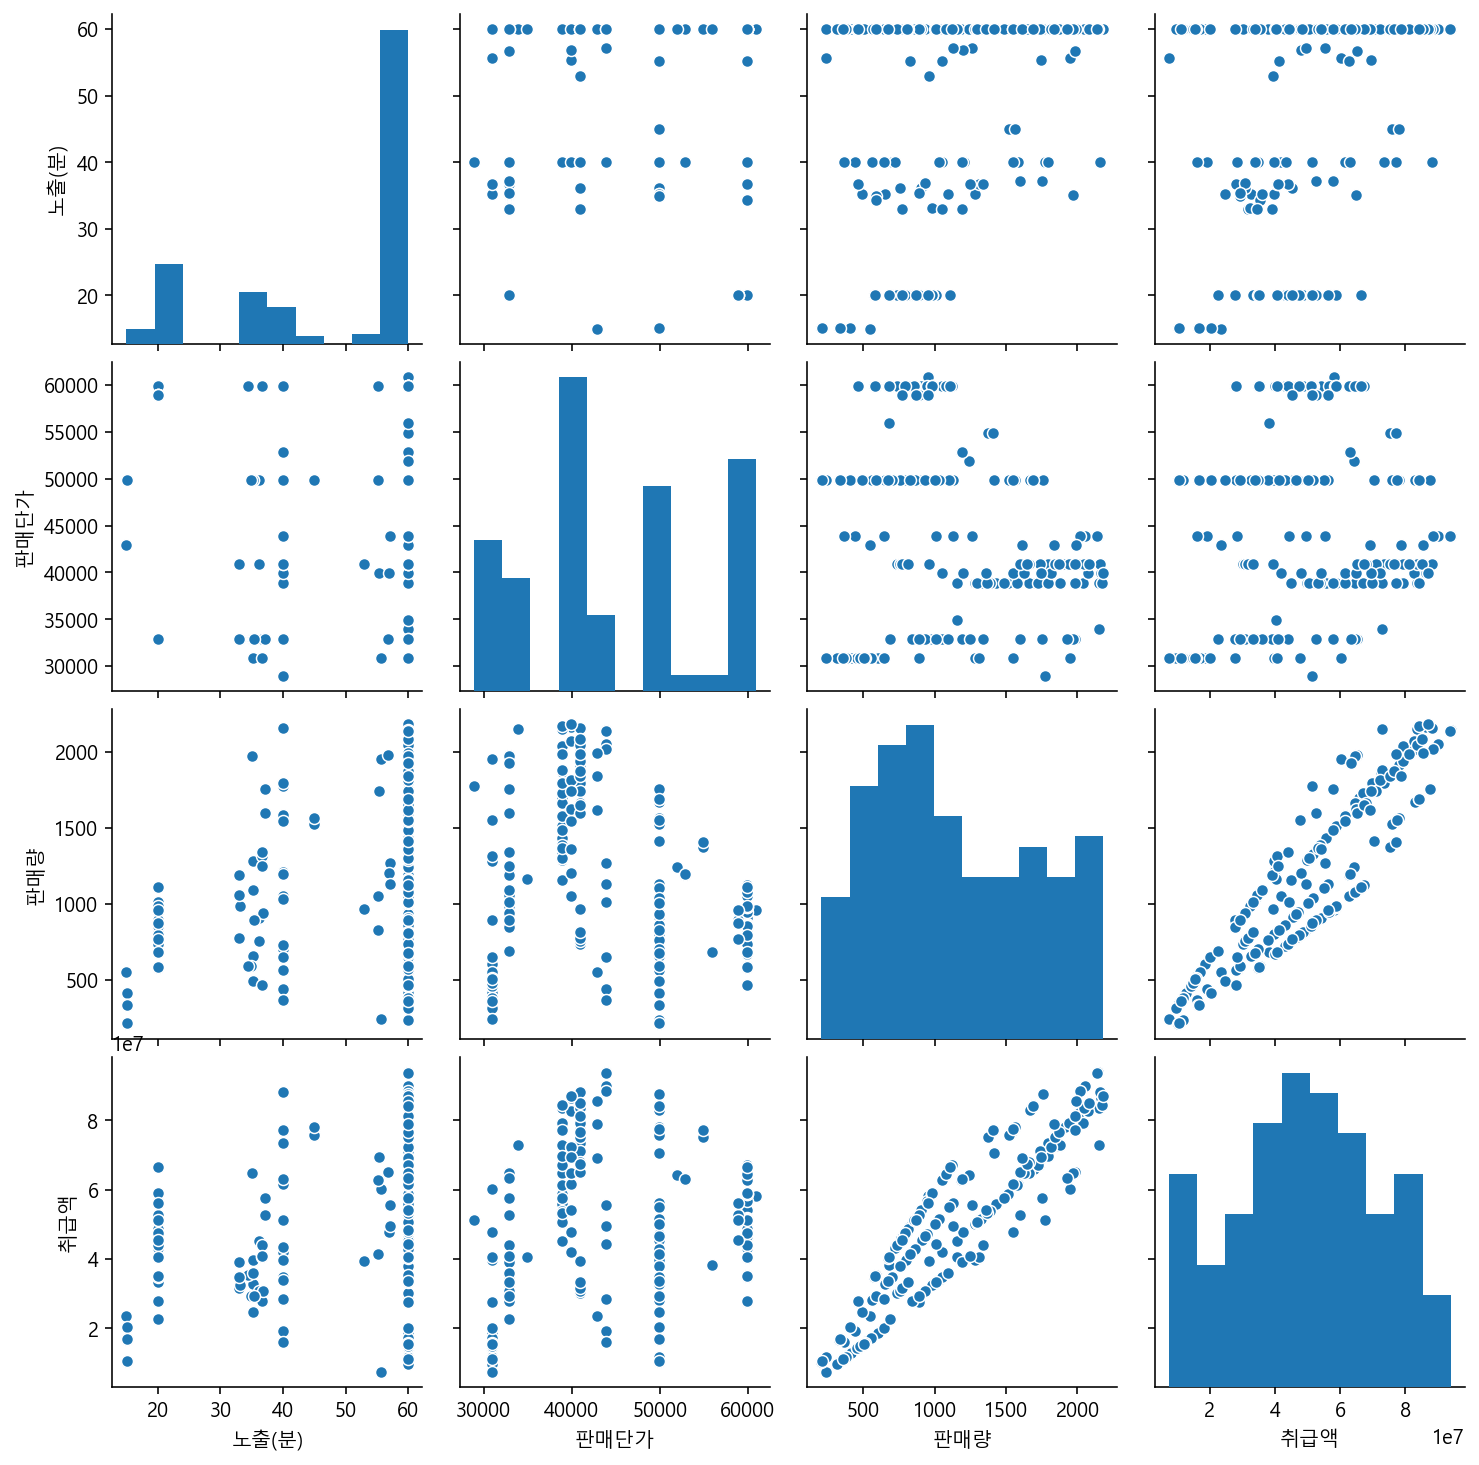

In [42]:
# 상관관계
display(df_1.corr())

# 그림
sns.pairplot(df_1[['노출(분)', '판매단가', '판매량', '취급액']])
plt.show()

### 계절별, 월별 분포
- 겨울이 적고, 봄이 많다!
- 봄에 파는 게 혹시 판매 단가 높은데 판매량 낮은 건가?
- 월별 분포를 봐도 3, 4, 5월에 농수축 전체에 비해 상대적으로 비중 높음.
    - 3월: 갑오징어(판매량 저조), 꼬막, 대구, 홍어, 재첩국, 문어// 오렌지, 국밥, 쌀(판매량 저조) --> 전체적으로 판매량 저조: 25% 이하인 애들.
    - 4월: 모시떡, 꽃게, 장조림세트, 부각, 쌀, 손질문어, 곤드레나물밥, 쥐포. --> 장조림, 쥐포 빼고 다 수백 대.
    - 5월: 가자미 빼고 다 저조하다.

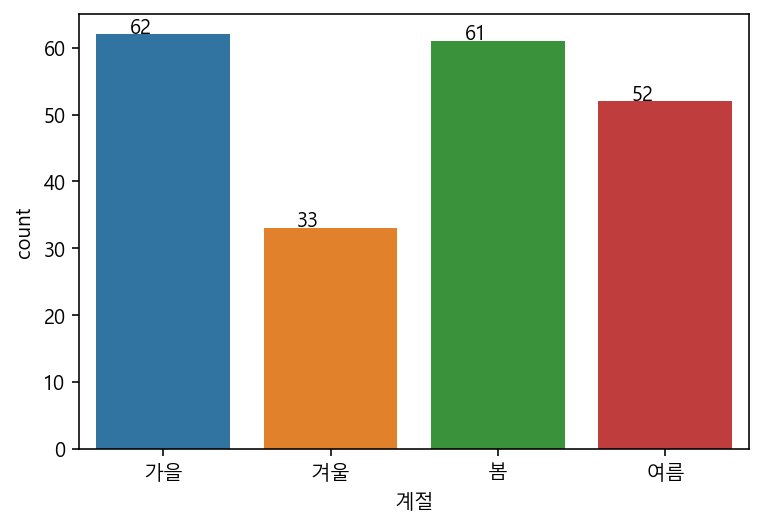

In [43]:
# 계절별 상품 분포
ax = sns.countplot(df_1['계절'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+0.2))
plt.show()

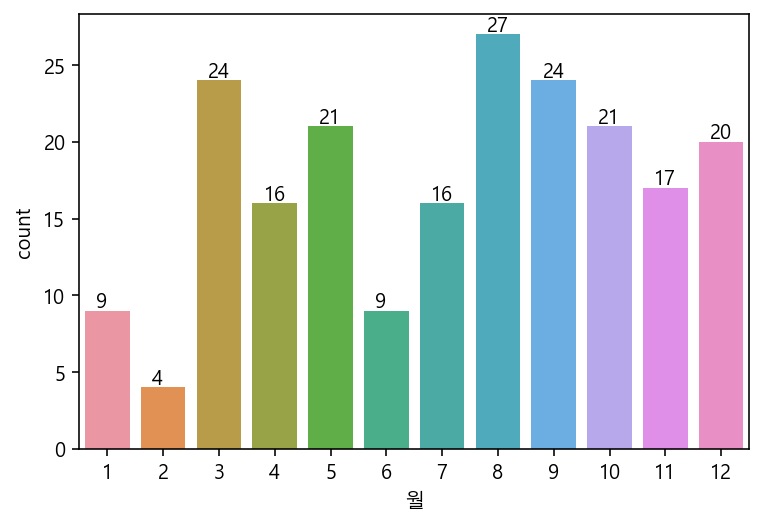

3     0.328767
4     0.258065
5     0.244186
12    0.181818
9     0.171429
10    0.162791
8     0.159763
11    0.153153
7     0.135593
6     0.128571
1     0.058065
2     0.042553
Name: 월, dtype: float64


In [44]:
# 월별 상품 분포
ax = sns.countplot(df_1['월'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+0.2))
plt.show()

# 전체 상품 분포와 비교
print((df_1['월'].value_counts().sort_index() / data['월'].value_counts().sort_index()).sort_values(ascending=False))

In [45]:
# 3월 상품 확인
df_1[df_1['월'] == 3]['상품명'].value_counts() # 상품 자체는 골고루 분포
df_1[df_1['월'] == 3].describe() # 역시나 저조

,노출(분),판매단가,판매량,취급액
count,24.000000,24.000000,24.000000,2.400000e+01
mean,51.347222,50108.333333,1117.885307,5.355771e+07
std,15.796480,7529.531232,477.413136,1.572653e+07
min,20.000000,39900.000000,670.317195,3.086500e+07
25%,54.041667,40900.000000,803.052382,4.327575e+07
50%,60.000000,49900.000000,922.605210,4.914750e+07
75%,60.000000,59900.000000,1214.358660,6.516575e+07
max,60.000000,59900.000000,2180.200501,8.699000e+07


In [46]:
# 4월 상품 확인
df_1[df_1['월'] == 4]['상품명'].value_counts() # 모시떡, 쌀.
df_1[df_1['월'] == 4].describe() # 판매량 저조.

,노출(분),판매단가,판매량,취급액
count,16.000000,16.000000,16.000000,1.600000e+01
mean,43.085417,45025.000000,825.708063,3.747550e+07
std,18.447112,13375.973485,435.255503,2.046051e+07
min,20.000000,30900.000000,403.689320,1.247400e+07
25%,20.000000,30900.000000,567.498865,1.807725e+07
50%,50.000000,45400.000000,739.434696,3.464900e+07
75%,60.000000,59900.000000,860.062604,4.806175e+07
max,60.000000,59900.000000,1970.851064,8.438800e+07


In [47]:
# 5월 상품 확인
df_1[df_1['월'] == 5]['상품명'].value_counts() # 모시떡!
df_1[df_1['월'] == 5].describe() # 판매량 저조. 3사분위 ~ max 갭 큼.

,노출(분),판매단가,판매량,취급액
count,21.000000,21.000000,21.000000,2.100000e+01
mean,47.904762,42042.857143,784.563364,3.464943e+07
std,17.868701,12618.580405,488.796665,2.370557e+07
min,20.000000,30900.000000,314.271845,9.711000e+06
25%,33.000000,30900.000000,411.067961,1.270200e+07
50%,60.000000,39900.000000,571.563126,2.852100e+07
75%,60.000000,59900.000000,983.505843,5.867900e+07
max,60.000000,59900.000000,2045.232274,8.365000e+07


### 요일별 분포

- 일요일이 많다.
    - 상품: 모시떡, 모시떡+식혜, 갑오징어, 순대곱창, 손질꽃게, 포기김치, 바다장어, 병어, 홍어, 부각, 손질문어, 쥐포, 황태, 쌀
    - 그 중에서도 **쌀**이 많다. 쌀을 일요일에 많이 팔았나? 애초에 군집1에 쌀이 24개인데, 그 중에서도 **일요일에 21번** 팔았다.
    - 쌀 고가인 편(59900)인데, 판매량은 저조.
    - **일요일의 모시떡**: 매우 안 팔린다.

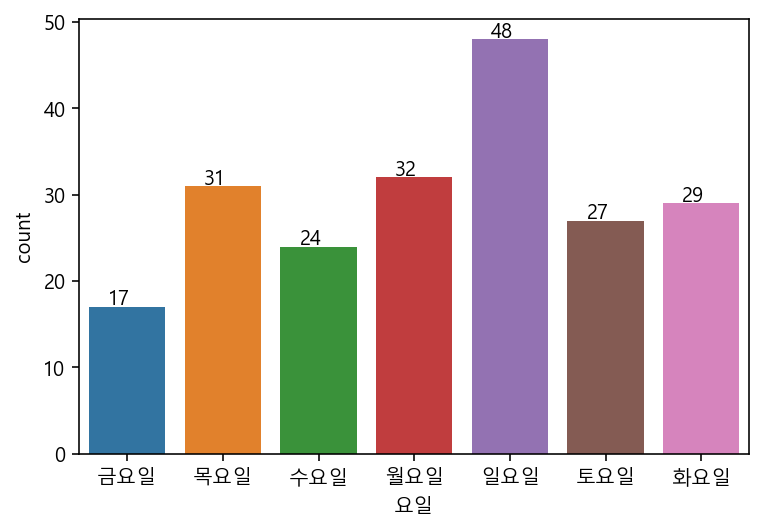

일요일    0.292683
토요일    0.156977
목요일    0.155779
월요일    0.154589
화요일    0.141463
수요일    0.125000
금요일    0.095506
Name: 요일, dtype: float64


In [48]:
# 시각화
ax = sns.countplot(df_1['요일'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+0.2))
plt.show()

# 전체 상품 분포와 비교
print((df_1['요일'].value_counts().sort_index() / data['요일'].value_counts().sort_index()).sort_values(ascending=False))

In [49]:
# 일요일인 상품 확인
df_1[df_1['요일'] == '일요일']['상품명'].value_counts() # 일요일에 제일 많이 판 게 쌀.
df_1[df_1['요일'] == '일요일'].describe()

,노출(분),판매단가,판매량,취급액
count,48.000000,48.000000,48.000000,4.800000e+01
mean,30.767361,49462.500000,912.958501,4.336775e+07
std,14.142731,11759.841962,378.142030,1.476259e+07
min,15.016667,30900.000000,335.210421,1.171600e+07
25%,20.000000,38900.000000,722.959098,3.241025e+07
50%,20.000000,54900.000000,817.102036,4.496400e+07
75%,36.291667,59900.000000,1010.600507,5.150500e+07
max,60.000000,59900.000000,1970.851064,7.716200e+07


In [50]:
# 모시떡 일요일에만 이런가?
df_1[df_1['상품명'].str.contains('모시떡')].sort_values(by='판매량', ascending=False)

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
201,9,가을,월요일,2019-09-09 18:00:00,2019-09-09 19:00:00,18,60.000000,농수축,100166,200577,영광 生 모시떡 130개(동부기피80개+검정깨50개),40900.0,2011.295844,82262000.0,1.0
180,7,여름,화요일,2019-07-30 01:00:00,2019-07-30 01:55:40,01,55.666667,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,1948.317152,60203000.0,1.0
202,9,가을,화요일,2019-09-10 11:00:00,2019-09-10 12:00:00,11,60.000000,농수축,100166,200577,영광 生 모시떡 130개(동부기피80개+검정깨50개),40900.0,1734.669927,70948000.0,1.0
185,10,가을,일요일,2019-10-06 01:20:00,2019-10-06 01:56:40,01,36.666667,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,1311.294498,40519000.0,1.0
179,7,여름,일요일,2019-07-21 01:20:00,2019-07-21 01:55:10,01,35.166667,농수축,100166,200576,영광 生 모시떡 100개!!(동부기피70개+검정깨30개),30900.0,1281.067961,39585000.0,1.0
221,8,여름,목요일,2019-08-15 18:00:00,2019-08-15 19:00:00,18,60.000000,농수축,100166,200578,영광 生 모시떡 90개+찰보리식혜(동부기피70개+검정깨20개),30900.0,648.770227,20047000.0,1.0
204,4,봄,화요일,2019-04-23 18:00:00,2019-04-23 19:00:00,18,60.000000,농수축,100166,200578,영광 生 모시떡 90개+찰보리식혜(동부기피70개+검정깨20개),30900.0,602.265372,18610000.0,1.0
218,8,여름,월요일,2019-08-05 18:00:00,2019-08-05 19:00:00,18,60.000000,농수축,100166,200578,영광 生 모시떡 90개+찰보리식혜(동부기피70개+검정깨20개),30900.0,551.229773,17033000.0,1.0
212,5,봄,토요일,2019-05-11 15:00:00,2019-05-11 16:00:00,15,60.000000,농수축,100166,200578,영광 生 모시떡 90개+찰보리식혜(동부기피70개+검정깨20개),30900.0,534.498382,16516000.0,1.0
205,4,봄,목요일,2019-04-25 15:00:00,2019-04-25 16:00:00,15,60.000000,농수축,100166,200578,영광 生 모시떡 90개+찰보리식혜(동부기피70개+검정깨20개),30900.0,533.300971,16479000.0,1.0


### 시간대별 분포
*굉장히* 특이하다. 
- 23시~07시까지의 비중이 차지하는 비중이 높다. 이 때 농수축을 편성을 안 했는데, 거의 이 군집에 몰려 있다. 이게 판매량 저조의 원인?(*이 때 농수축 잘 안 팔리는 시간대라고도 볼 수 있을 듯?*)
    - 1시
        - **쥐포**가 제일 많다. 편성은 띄엄띄엄. 한 달에 1~2개씩. 근데 그 1~2개씩 편성한 게 1시에 들어 있다. 판매량이 적은 편은 아닌 듯? 
        - **모시떡**은 다른 방송시간대(?)의 모시떡에 비하면 잘 팔린 편. 241개 빌런 하나 있음.
    - 2시: **쥐포만** 팔았다. 1시~2시 쥐포 이어 팔았나? 그렇다. `11/09`, `11/17`, ` 12/28`에 쥐포 팔았다. 
        - 애초에 전체 농수축에서 2시에 판매한 게 별로 없는데 왜 쥐포가 이 때 연속 방영이었지?
        - 판매량이 별로 없는데. 연말로 가면서 떨이?
    - 6시: 4개의 상품. 전부 쪽박. 세 자릿수도 안 된다.
    - 7시: 3개의 상품. 
    - 23시: 2개의 상품. 홍어, 황태. 나름 이 군집 안에서는 괜찮게 팔았다.
- 클러스터 내에서는 여전히 16시, 18시 개수가 많긴 하다.
    - 18시
        - **쌀**이 너무 많다. 혹시나 해서 확인해 보니, **일요일**이다! **3, 4, 5월 일요일 18시에 쌀이 편성된 때에 굉장히 저조**하다. 뭐지? 가뭄? 쌀 안 사는 소비자들?
        - 모시떡: 한 번만 대박(이 클러스터 안에 한해서)나고, 나머지는 저조.
    - 16시: 모시떡 again, 저조 again. 다른 몇 개 상품들도 저조한 게 좀 보이기는 한다.

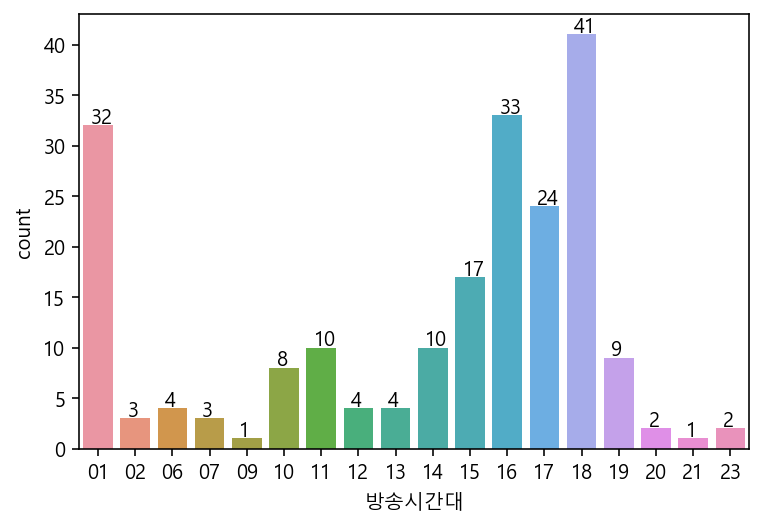

01    0.888889
02    0.750000
06    0.666667
07    0.500000
23    0.500000
19    0.281250
09    0.200000
15    0.191011
14    0.185185
18    0.183857
10    0.129032
16    0.122677
11    0.113636
12    0.100000
13    0.095238
17    0.085106
20    0.062500
21    0.045455
00         NaN
08         NaN
22         NaN
Name: 방송시간대, dtype: float64


In [51]:
# 시각화
ax = sns.countplot(df_1['방송시간대'])
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+0.2))
plt.show()

# 전체 상품 분포와 비교
print((df_1['방송시간대'].value_counts().sort_index() / data['방송시간대'].value_counts().sort_index()).sort_values(ascending=False))

In [52]:
# 방송시간대 1시
df_1[df_1['방송시간대'] == '01']['상품명'].value_counts()
# df_1[(df_1['방송시간대'] == '01') & (df_1['상품명'].str.contains('쥐포'))]
# df_1[df_1['방송시간대'] == '01']

옛날 그 쥐포 110장 (11팩)                    12
영광 生 모시떡 100개!!(동부기피70개+검정깨30개)        3
사용불가미리구운 자연산 바다장어 9팩                   3
김정문의 섬진강 재첩국 11팩 3.3kg                 2
영산포숙성 홍어8팩+무침3통                        2
제주 한라봉2박스+천혜향1박스                       1
국내산 손질 병어 26미                          1
영산포숙성 홍어 13팩                           1
국내산 손질갑오징어 8팩                          1
제주바다 7분 손질문어                           1
청정수산 완도활전복 35미                         1
영광 生 모시떡 90개+찰보리식혜(동부기피70개+검정깨20개)     1
(a4)팽현숙의 순대 곱창 전골&볶음                   1
하늘내린 용대리황태10마리                         1
국내산 영산포숙성 홍어 6팩+홍어무침1통                 1
Name: 상품명, dtype: int64

In [53]:
# 방송시간대 2시
df_1[df_1['방송시간대'] == '02']['상품명'].value_counts() # 쥐포 이어 팔았나?
df_1[(df_1['방송시간대'].isin(['01', '02'])) & (df_1['상품명'].str.contains('쥐포'))] # 이어 팔았다.
df_1[df_1['방송시간대'] == '02'].describe()

,노출(분),판매단가,판매량,취급액
count,3.0,3.0,3.000000,3.000000e+00
mean,20.0,32900.0,847.659574,2.788800e+07
std,0.0,0.0,160.637936,5.284988e+06
min,20.0,32900.0,688.844985,2.266300e+07
25%,20.0,32900.0,766.458967,2.521650e+07
50%,20.0,32900.0,844.072948,2.777000e+07
75%,20.0,32900.0,927.066869,3.050050e+07
max,20.0,32900.0,1010.060790,3.323100e+07


In [54]:
# 방송시간대 6시
df_1[df_1['방송시간대'] == '06']['상품명'].value_counts()
df_1[df_1['방송시간대'] == '06'].describe()

,노출(분),판매단가,판매량,취급액
count,4.0,4.000000,4.000000,4.000000e+00
mean,60.0,50400.000000,703.089073,3.475300e+07
std,0.0,10969.655115,94.331814,4.216954e+06
min,60.0,40900.000000,592.136895,3.011600e+07
25%,60.0,40900.000000,650.772120,3.248525e+07
50%,60.0,50400.000000,703.324857,3.437200e+07
75%,60.0,59900.000000,755.641809,3.663975e+07
max,60.0,59900.000000,813.569682,4.015200e+07


In [55]:
# 방송시간대 7시
df_1[df_1['방송시간대'] == '07']['상품명'].value_counts()
df_1[df_1['방송시간대'] == '07']

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
880,1,겨울,목요일,2019-01-03 07:00:00,2019-01-03 08:00:00,07,60.0,농수축,100582,201788,천연담아 명품다시팩 100포,39900.0,2070.576441,82616000.0,1.0
892,11,가을,월요일,2019-11-11 07:20:00,2019-11-11 08:20:00,07,60.0,농수축,100587,201805,[슬로푸드] 도라지 품은 산돌배즙 6박스 (80g x 10포 x 6박스),59900.0,1097.863105,65762000.0,1.0
893,12,겨울,수요일,2019-12-11 07:20:00,2019-12-11 08:20:00,07,60.0,농수축,100587,201805,[슬로푸드] 도라지 품은 산돌배즙 6박스 (80g x 10포 x 6박스),59900.0,904.073456,54154000.0,1.0


In [56]:
# 방송시간대 23시
df_1[df_1['방송시간대'] == '23']['상품명'].value_counts()
df_1[df_1['방송시간대'] == '23']

,월,계절,요일,방송시작,방송종료,방송시간대,노출(분),상품군,마더코드,상품코드,상품명,판매단가,판매량,취급액,Cluster
959,8,여름,화요일,2019-08-27 23:00:00,2019-08-28,23,60.0,농수축,100702,202073,영산포숙성 홍어 9팩,38900.0,2168.997429,84374000.0,1.0
1195,9,가을,월요일,2019-09-09 23:00:00,2019-09-10,23,60.0,농수축,100844,202489,하늘내린 용대리황태10마리,32900.0,1923.617021,63287000.0,1.0


In [57]:
# 방송시간대 18시
df_1[df_1['방송시간대'] == '18']['상품명'].value_counts() # 쌀!
df_1[df_1['방송시간대'] == '18'].describe() # 판매량 3사분위부터 좀 괜찮은 편.

,노출(분),판매단가,판매량,취급액
count,41.000000,41.000000,41.000000,4.100000e+01
mean,35.976016,49753.658537,1081.653839,5.157068e+07
std,19.209553,11850.234123,535.571215,2.052205e+07
min,15.016667,28900.000000,356.278317,1.100900e+07
25%,20.000000,39900.000000,734.457429,4.338400e+07
50%,20.000000,59900.000000,854.474124,5.049900e+07
75%,60.000000,59900.000000,1578.611825,6.140800e+07
max,60.000000,59900.000000,2180.200501,8.861500e+07


In [58]:
# 방송시간대 16시
df_1[df_1['방송시간대'] == '16']['상품명'].value_counts() # 골고루 분포하는 편. 모시떡 최대.
df_1[df_1['방송시간대'] == '16'].describe()

,노출(분),판매단가,판매량,취급액
count,33.000000,33.000000,33.000000,3.300000e+01
mean,52.576263,43354.545455,1174.447589,5.178418e+07
std,14.900513,9048.794495,630.117532,2.866897e+07
min,14.983333,30900.000000,207.494990,9.711000e+06
25%,60.000000,38900.000000,548.951049,2.355000e+07
50%,60.000000,43900.000000,1186.313800,5.817100e+07
75%,60.000000,49900.000000,1685.531062,7.644300e+07
max,60.000000,60900.000000,2141.184510,9.399800e+07


### 각 범주별 취급액과의 관계 확인
 전체 농수산 특징, cluster0과 달리 좀 특이하다. 
- mean이 고르지 않다. 아까도 봤듯 깎아먹는 애가 있어서 그런 것 같다.
- 전체적으로 sum에 비해 mean이 높아진다. 판매량이 저조한 상품이 많아서?
    - 2월, 6월 취급액 sum은 낮은데, mean은 높다.
    - 특히 방송시간대 널뛰기가 심하다.
- 반대인 경우도 있다.
    - 일요일 취급액 sum은 높은 편인데, mean은 낮은 편이다. 쌀이 일조한 듯?

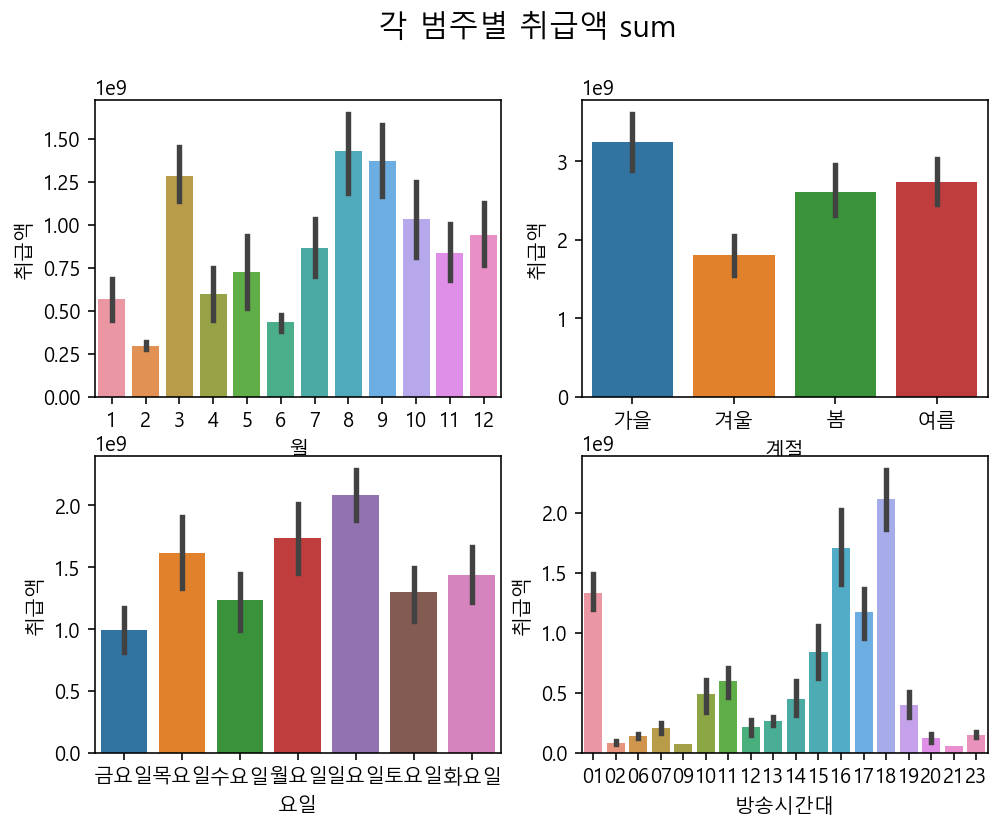

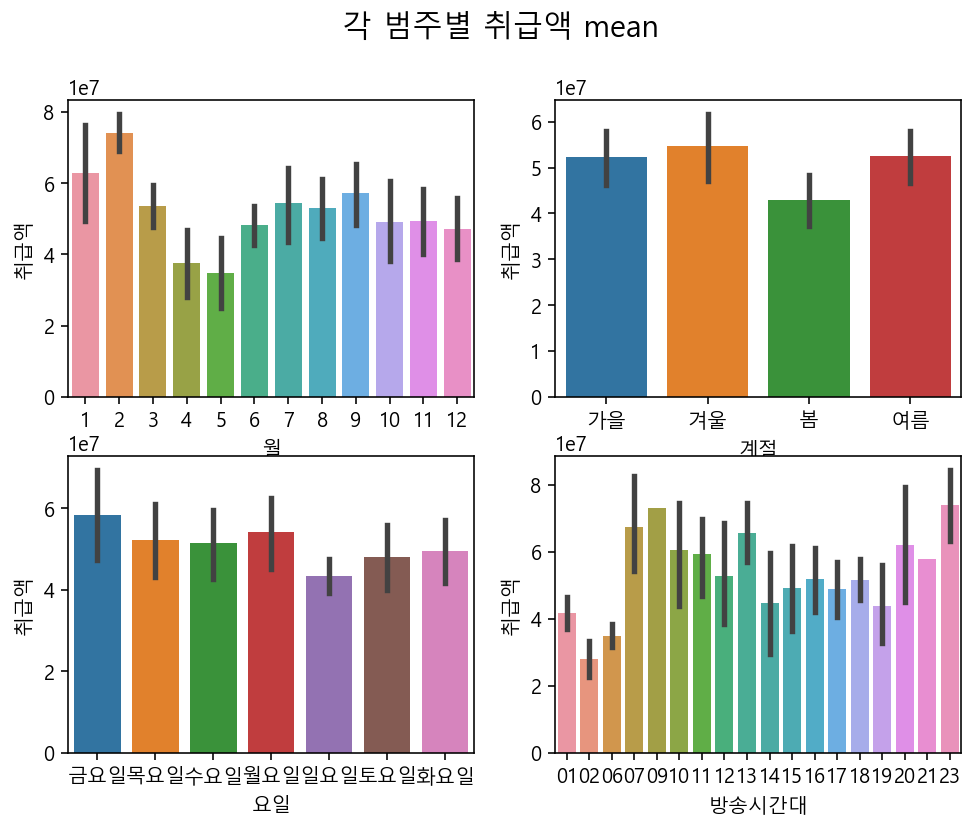

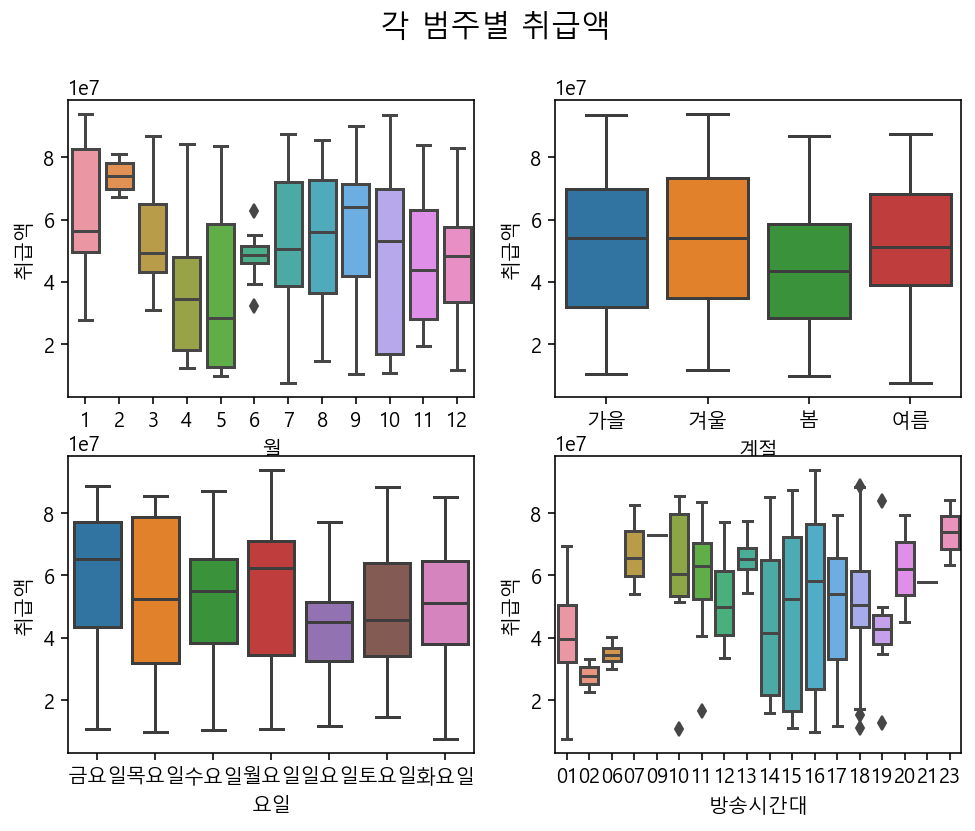

In [59]:
plotCatNum(df_1, ['월', '계절', '요일', '방송시간대'], '취급액', 'bar', 'sum')
plotCatNum(df_1, ['월', '계절', '요일', '방송시간대'], '취급액', 'bar', 'mean')
plotCatNum(df_1, ['월', '계절', '요일', '방송시간대'], '취급액', 'box')

### 각 범주별 판매량과의 관계 확인
- 널뛰기 심하다.

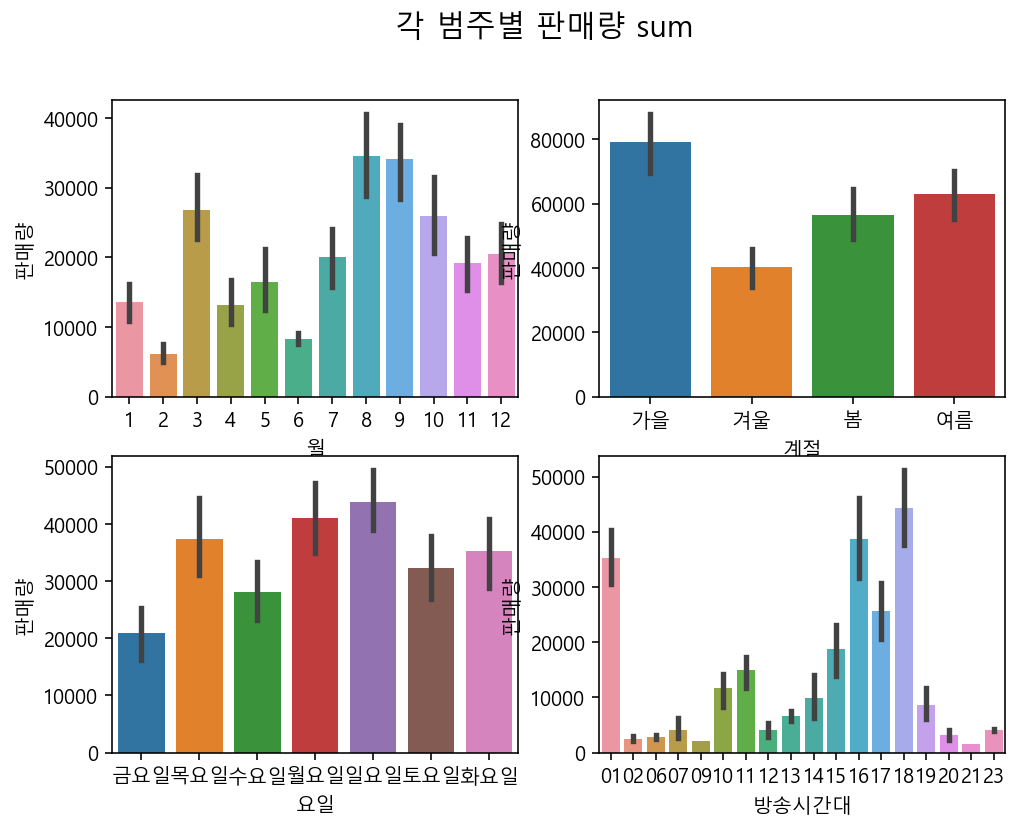

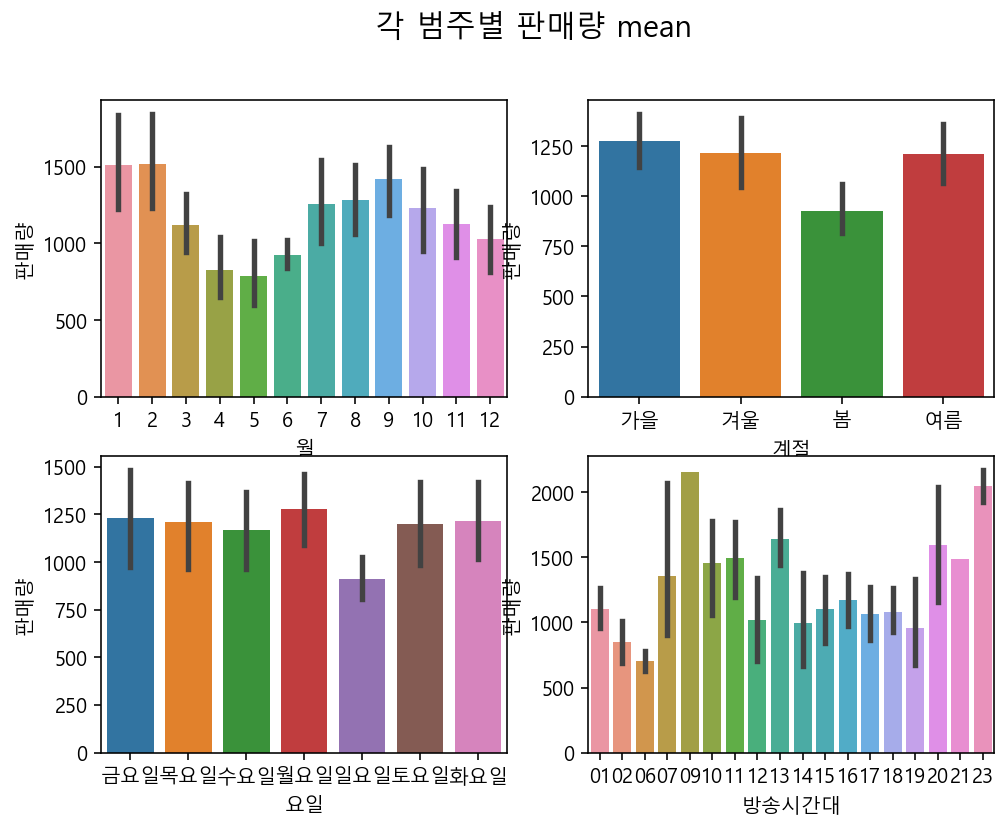

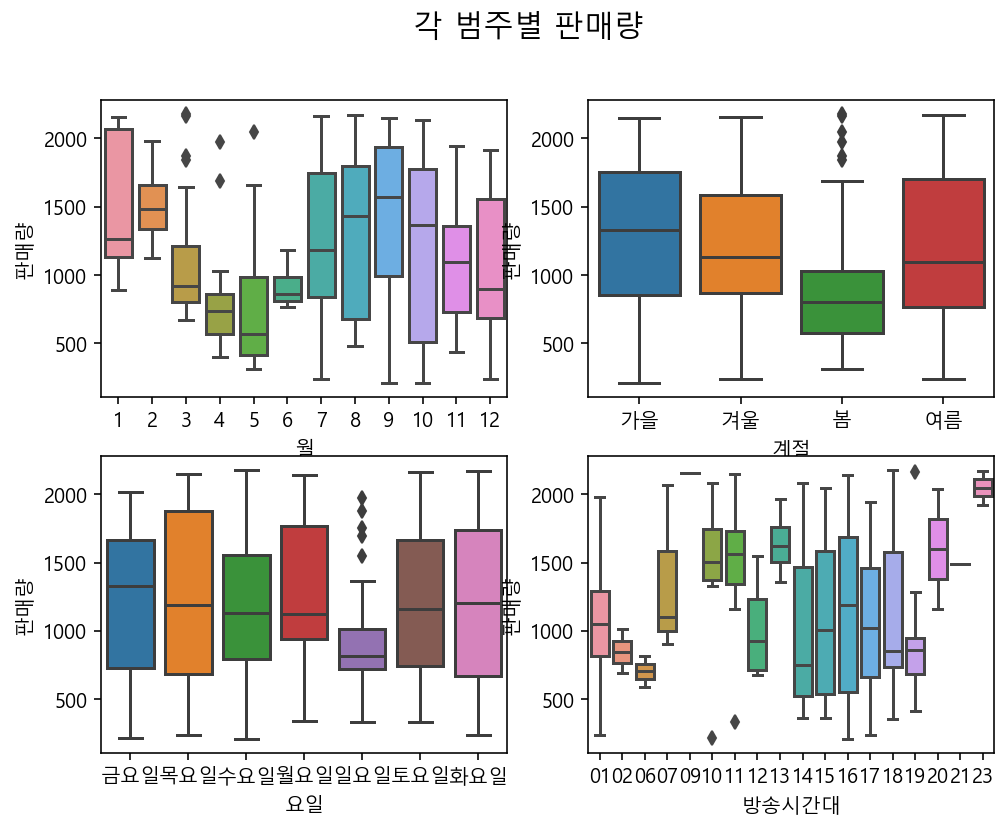

In [60]:
plotCatNum(df_1, ['월', '계절', '요일', '방송시간대'], '판매량', 'bar', 'sum')
plotCatNum(df_1, ['월', '계절', '요일', '방송시간대'], '판매량', 'bar', 'mean')
plotCatNum(df_1, ['월', '계절', '요일', '방송시간대'], '판매량', 'box')

### 각 범주별 판매단가와의 관계 확인
- 3, 4, 5월(봄)에 판매단가 범주 큰 상품들을 팔았다.

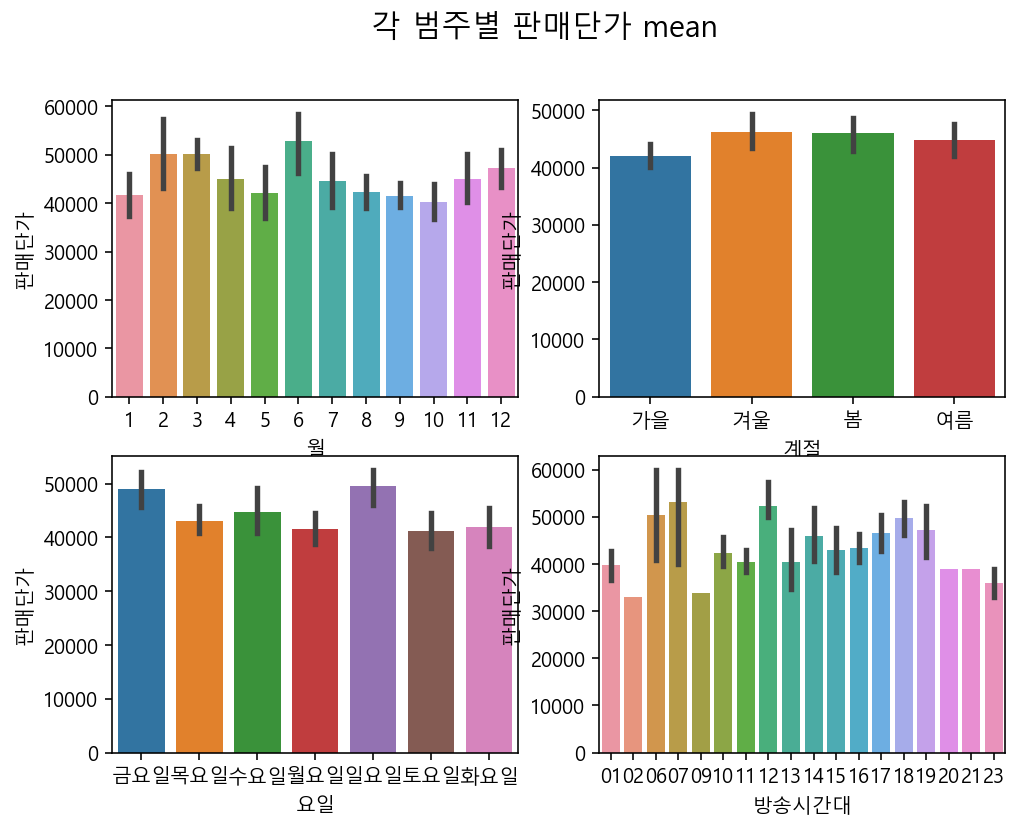

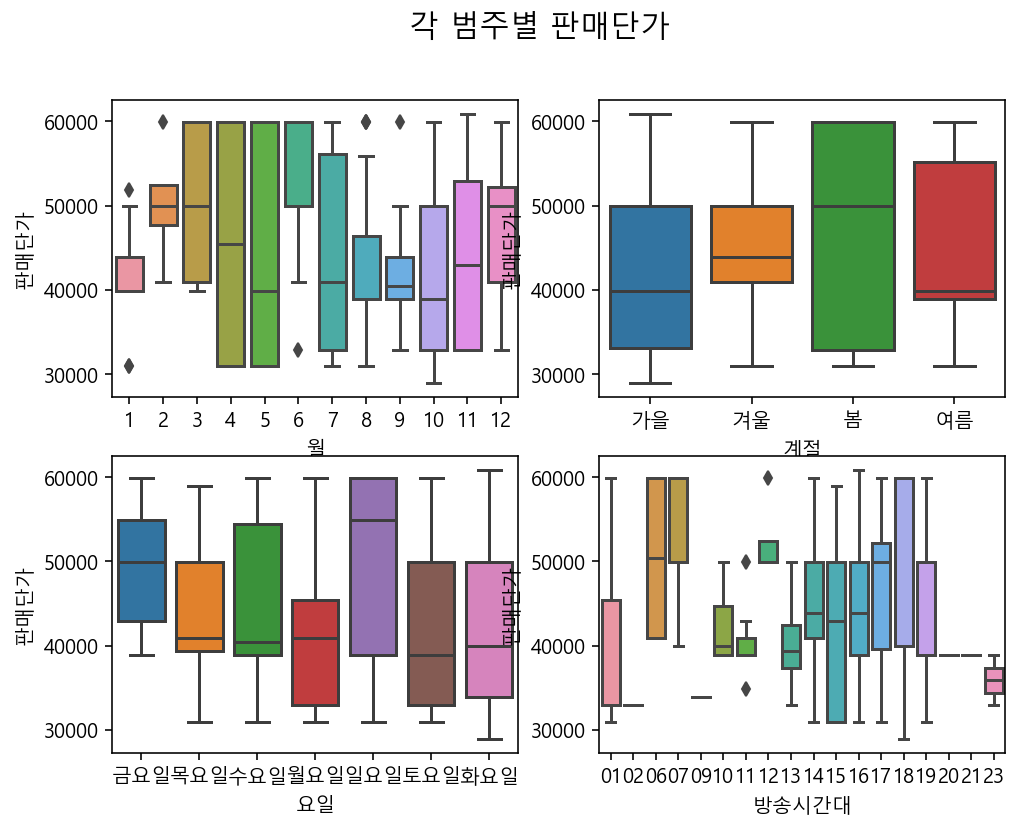

In [61]:
plotCatNum(df_1, ['월', '계절', '요일', '방송시간대'], '판매단가', 'bar', 'mean')
plotCatNum(df_1, ['월', '계절', '요일', '방송시간대'], '판매단가', 'box')

### 각 범주별 노출시간과의 관계 확인
- 60분 넘는 상품 없다!

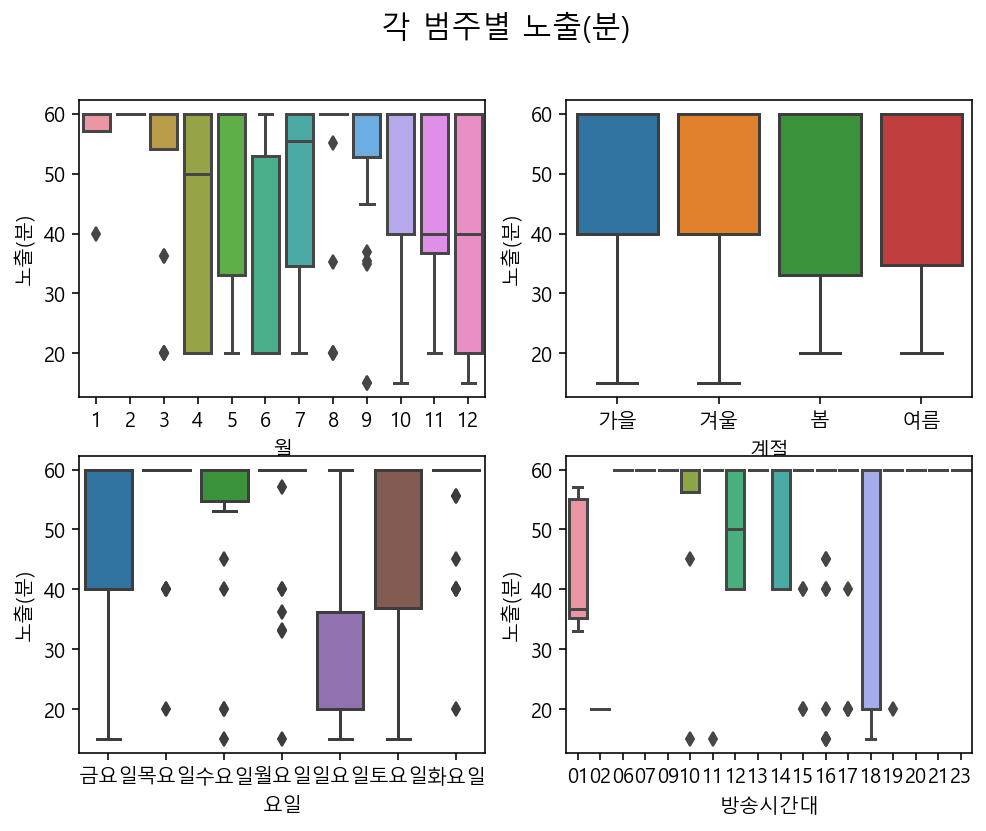

In [62]:
plotCatNum(df_1, ['월', '계절', '요일', '방송시간대'], '노출(분)', 'box')

### 월별 방송시간대
- 위에서 보았듯, 23~11시까지의 분포가 눈에 띈다. 16, 18시는 다른 농수축 시간대 분포와 마찬가지이고.

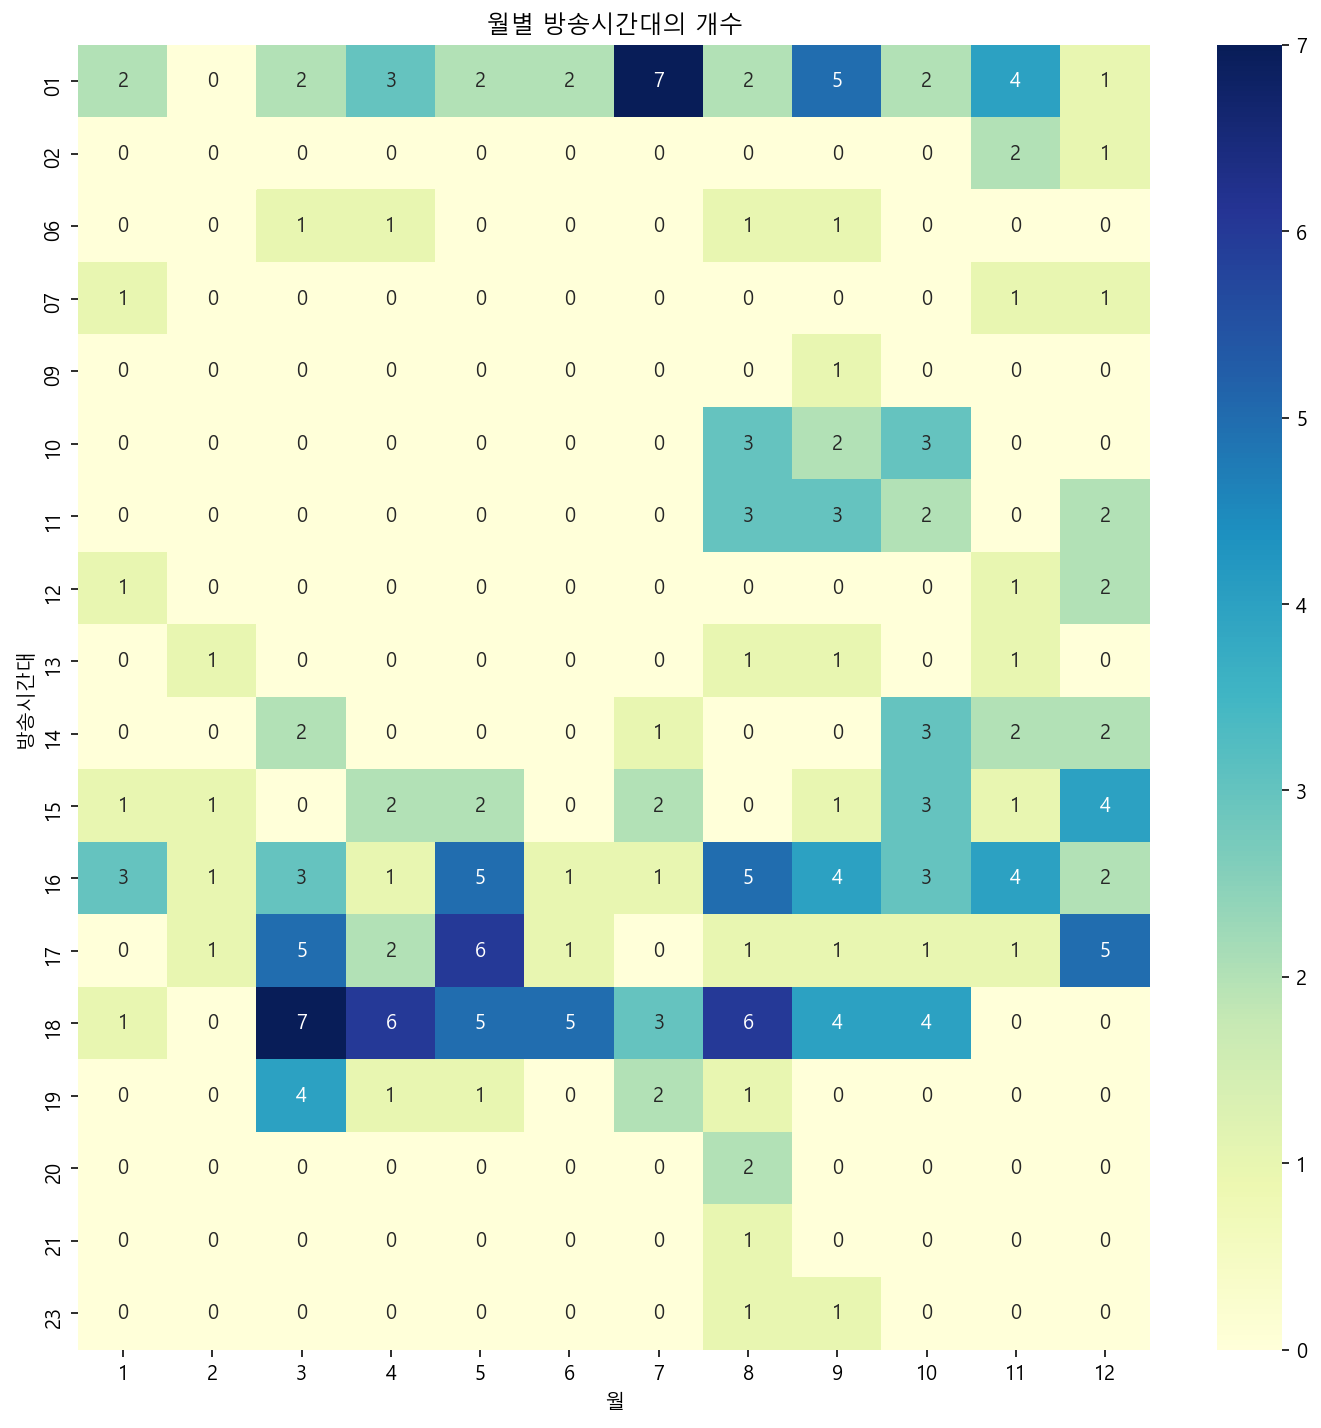

In [63]:
countCatCat(df_1, '방송시간대', '월')